In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from polyase import *
import anndata as ad
import numpy as np
import os

## 1) Loading the allele-specific count data 

First we load in the allele-specific counts for our 8 samples (IsoSeq from 4 x potato tubers, 4 x potato leaves). We also have some metadata that links the gene ids from the alleles of a gene together with "Synt_ids" and we have some information about the allele lengths that we use for quality control.

### Correct metadata file gene_ids 

In [ ]:
# read in var obs file
var_obs_file = "/scratch/nadjafn/potato-allelic-orthogroups/output_atlantic/03_GENESPACE/ATL_v3.hc_gene_models.repr_genespace_categories.tsv"
# to dataframe
var_obs_df = pd.read_csv(var_obs_file, sep="\t", index_col=0)

var_obs_df.index = var_obs_df['transcript_id'].str.rsplit('.', n =1).str[0]

# save to file
var_obs_df.to_csv("/scratch/nadjafn/potato-allelic-orthogroups/output_atlantic/03_GENESPACE/ATL_v3.hc_gene_models.repr_genespace_categories_geneID.tsv", sep="\t")

: 

## Read in data

In [2]:
# Metadata for genes
var_obs_file = "/scratch/nadjafn/potato-allelic-orthogroups/output_atlantic/03_GENESPACE/ATL_v3.hc_gene_models.repr_genespace_categories_geneID.tsv"
# directory of gene counts from minimap2
gene_counts_dir = "/scratch/nadjafn/nf-core-plantlongrnaseq/output_atlantic_cds/oarfish/"
tx2gene = "/DKED/scratch/nadjafn/nf-core-plantlongrnaseq/work/45/47453b93aa3c9adbfc1de56b16ec01/tx2gene.tsv"
# Define sample IDs and their conditions
sample_info = {
    "SRR14993892": "leaf",
    "SRR14993893": "leaf", 
    "SRR14993894": "leaf",
    "SRR14993895": "leaf",
    "SRR14996168": "leaf",
    "SRR14995031": "tuber",
    "SRR14995032": "tuber",
    "SRR14995033": "tuber",
    "SRR14995034": "tuber",
    "SRR14995933": "tuber",
}

# Load the data into an AnnData object
allelic_data = load_ase_data(
    var_obs_file=var_obs_file,
    sample_info=sample_info,
    tx_to_gene_file=tx2gene,
    isoform_counts_dir=gene_counts_dir
)


/DKED/scratch/nadjafn/polyase/polyase/ase_data_loader.py:159: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Soltu.Atl_v3.01_1G000010.1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  isoform_var.loc[transcript_id, col] = var_obs.loc[gene_id, col]
/DKED/scratch/nadjafn/polyase/polyase/ase_data_loader.py:159: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Synt_id_2249' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  isoform_var.loc[transcript_id, col] = var_obs.loc[gene_id, col]
/DKED/scratch/nadjafn/polyase/polyase/ase_data_loader.py:159: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1hap1_1hap2_1hap3_1hap4_s' has dtype incompatible with float64, please expl

In [3]:
allelic_data.var

transcript_id  \
tname                                                    
Soltu.Atl_v3.01_1G000010.1  Soltu.Atl_v3.01_1G000010.1   
Soltu.Atl_v3.01_1G000020.2  Soltu.Atl_v3.01_1G000020.2   
Soltu.Atl_v3.01_1G000030.2  Soltu.Atl_v3.01_1G000030.2   
Soltu.Atl_v3.01_1G000040.1  Soltu.Atl_v3.01_1G000040.1   
Soltu.Atl_v3.01_1G000050.1  Soltu.Atl_v3.01_1G000050.1   
...                                                ...   
Soltu.Atl_v3.12_4G015910.1  Soltu.Atl_v3.12_4G015910.1   
Soltu.Atl_v3.12_4G015920.1  Soltu.Atl_v3.12_4G015920.1   
Soltu.Atl_v3.12_4G015960.1  Soltu.Atl_v3.12_4G015960.1   
Soltu.Atl_v3.12_4G016090.1  Soltu.Atl_v3.12_4G016090.1   
Soltu.Atl_v3.12_4G016110.1  Soltu.Atl_v3.12_4G016110.1   

                                             gene_id feature_type  \
tname                                                               
Soltu.Atl_v3.01_1G000010.1  Soltu.Atl_v3.01_1G000010   transcript   
Soltu.Atl_v3.01_1G000020.2  Soltu.Atl_v3.01_1G000020   transcript   
Soltu.Atl_v3.01_1G000030.2  Soltu.Atl_v3.01_1G000030   transcript   
Soltu.Atl_v3.01_1G000040.1  Soltu.Atl_v3.01_1G000040   transcript   
Soltu.Atl_v3.01_1G000050.1  Soltu.Atl_v3.01_1G000050   transcript   
...                                              ...          ...   
Soltu.Atl_v3.12_4G015910.1  Soltu.Atl_v3.12_4G015910   transcript   
Soltu.Atl_v3.12_4G015920.1  Soltu.Atl_v3.12_4G015920   transcript   
Soltu.Atl_v3.12_4G015960.1  Soltu.Atl_v3.12_4G015960   transcript   
Soltu.Atl_v3.12_4G016090.1  Soltu.Atl_v3.12_4G016090   transcript   
Soltu.Atl_v3.12_4G016110.1  Soltu.Atl_v3.12_4G016110   transcript   

                                       transcript_id.1        Synt_id  \
tname                                                                   
Soltu.Atl_v3.01_1G000010.1  Soltu.Atl_v3.01_1G000010.1   Synt_id_2249   
Soltu.Atl_v3.01_1G000020.2  Soltu.Atl_v3.01_1G000020.2   Synt_id_2251   
Soltu.Atl_v3.01_1G000030.2  Soltu.Atl_v3.01_1G000030.2   Synt_id_2254   
Soltu.Atl_v3.01_1G000040.1  Soltu.Atl_v3.01_1G000040.1   Synt_id_2255   
Soltu.Atl_v3.01_1G000050.1  Soltu.Atl_v3.01_1G000050.1   Synt_id_2256   
...                                                ...            ...   
Soltu.Atl_v3.12_4G015910.1  Soltu.Atl_v3.12_4G015910.1  Synt_id_34993   
Soltu.Atl_v3.12_4G015920.1  Soltu.Atl_v3.12_4G015920.1  Synt_id_36849   
Soltu.Atl_v3.12_4G015960.1  Soltu.Atl_v3.12_4G015960.1  Synt_id_34993   
Soltu.Atl_v3.12_4G016090.1  Soltu.Atl_v3.12_4G016090.1    Synt_id_839   
Soltu.Atl_v3.12_4G016110.1  Soltu.Atl_v3.12_4G016110.1  Synt_id_34993   

                                        synteny_category  \
tname                                                      
Soltu.Atl_v3.01_1G000010.1     1hap1_1hap2_1hap3_1hap4_s   
Soltu.Atl_v3.01_1G000020.2  2hap1_2hap2_1hap3_1hap4_no_s   
Soltu.Atl_v3.01_1G000030.2     1hap1_0hap2_1hap3_0hap4_s   
Soltu.Atl_v3.01_1G000040.1     1hap1_1hap2_1hap3_1hap4_s   
Soltu.Atl_v3.01_1G000050.1     1hap1_1hap2_1hap3_1hap4_s   
...                                                  ...   
Soltu.Atl_v3.12_4G015910.1  1hap1_2hap2_1hap3_4hap4_no_s   
Soltu.Atl_v3.12_4G015920.1  1hap1_0hap2_1hap3_3hap4_no_s   
Soltu.Atl_v3.12_4G015960.1  1hap1_2hap2_1hap3_4hap4_no_s   
Soltu.Atl_v3.12_4G016090.1  1hap1_2hap2_0hap3_2hap4_no_s   
Soltu.Atl_v3.12_4G016110.1  1hap1_2hap2_1hap3_4hap4_no_s   

                                                               syntenic_genes  \
tname                                                                           
Soltu.Atl_v3.01_1G000010.1  Soltu.Atl_v3.01_1G000010.1,Soltu.Atl_v3.01_2G0...   
Soltu.Atl_v3.01_1G000020.2  Soltu.Atl_v3.01_1G000020.2,Soltu.Atl_v3.01_1G0...   
Soltu.Atl_v3.01_1G000030.2  Soltu.Atl_v3.01_1G000030.2,nan,Soltu.Atl_v3.01...   
Soltu.Atl_v3.01_1G000040.1  Soltu.Atl_v3.01_1G000040.1,Soltu.Atl_v3.01_2G0...   
Soltu.Atl_v3.01_1G000050.1  Soltu.Atl_v3.01_1G000050.1,Soltu.Atl_v3.01_2G0...   
...                                                                       ...   
Soltu.Atl

In [4]:
# Usage
adata_gene = aggregate_transcripts_to_genes(allelic_data)

# Check the result
print(adata_gene)
print(f"Gene-level unique counts sum: {adata_gene.layers['unique_counts'].sum()}")
print(f"Original transcript-level unique counts sum: {allelic_data.layers['unique_counts'].sum()}")
print(f"Gene-level ambiguous counts mean: {adata_gene.layers['ambiguous_counts'].mean():.2f}")
print(f"Original transcript-level ambiguous counts mean: {allelic_data.layers['ambiguous_counts'].mean():.2f}")

Aggregating 105437 transcripts to 105437 genes
Created gene-level AnnData: 10 × 105437
Average transcripts per gene: 1.00
AnnData object with n_obs × n_vars = 10 × 105437
    obs: 'condition'
    var: 'gene_id', 'feature_type', 'transcript_id', 'Synt_id', 'synteny_category', 'syntenic_genes', 'haplotype', 'CDS_length_category', 'CDS_percent_difference', 'CDS_haplotype_with_longest_annotation', 'n_transcripts'
    layers: 'unique_counts', 'ambiguous_counts'
Gene-level unique counts sum: 15049484.0
Original transcript-level unique counts sum: 15049484
Gene-level ambiguous counts mean: 11.56
Original transcript-level ambiguous counts mean: 11.56


Data table rows are different genes

### Metadata
* Synt_id: links together the transcript ids from the same gene on the different haplotypes 
* synteny category: type of allele group (e.g 1hap1_1hap2_1hap3_1hap4_s: on each haplotype 1 copy of the gene)

# 2) Quality Control

We first need to check if the allelic counts are okay. 
We will also remove genes with low expression.

## Filter genenes with low expression

We filter Syntelog groups that don't have a min expression. This function can also be used to filter for gene_id expression or similar

In [5]:
#CPM threshold (automatically normalized)
adata_gene_filtered = filter_low_expressed_genes(
    adata_gene,
    min_expression=20.0,  # 20 count per million
    lib_size_normalization='cpm',
    mode='all',
    library_size_dependent=True,
    verbose=True)

Using library-size adjusted thresholds:
  SRR14993892: 13.49
  SRR14993893: 6.93
  SRR14993894: 61.89
  SRR14993895: 32.55
  SRR14996168: 46.60
  ... and 5 more
Filtered out 32986 groups
Kept 5150 / 105437 items


## Calculate allelic ratios

To see if there is bias 

In [6]:
allelic_data_filtered = calculate_allelic_ratios(adata_gene_filtered , 'unique_counts')
allelic_data_filtered = calculate_multi_ratios(adata_gene_filtered, 'unique_counts', 'ambiguous_counts')

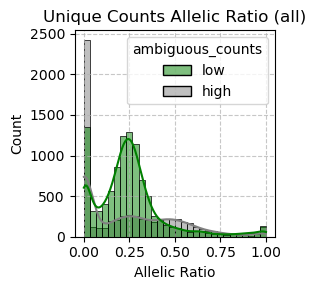

In [7]:

plot_allelic_ratios(
    allelic_data_filtered,
    synteny_category="1hap1_1hap2_1hap3_1hap4_s", 
    sample='all', 
    ratio_type="unique",
    figsize = (3,3),
    kde = True,
    multimapping_threshold=0.25
)


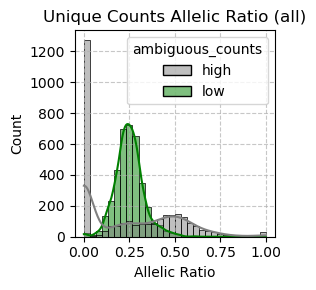

In [8]:
# filter transcripts that are not equal lengths
mask = allelic_data_filtered .var["CDS_haplotype_with_longest_annotation"] == "equal_lengths"
allelic_data_length_filter = allelic_data_filtered [:,mask].copy()
plot_allelic_ratios(
    allelic_data_length_filter,
    synteny_category="1hap1_1hap2_1hap3_1hap4_s", 
    sample='all', 
    ratio_type="unique",
    figsize = (3,3),
    kde = True,
    multimapping_threshold=0.25
)

In [ ]:
def test_allelic_ratios_within_conditions(adata, layer="unique_counts", test_condition="control", inplace=True):
    """
    Test if alleles of a gene have unequal expression and store results in AnnData object.

    Parameters
    -----------
    adata : AnnData
        AnnData object containing expression data
    layer : str, optional
        Layer containing count data (default: "unique_counts")
    test_condition : str, optional
        Variable column name containing condition for testing within (default: "control")
    inplace : bool, optional
        Whether to modify the input AnnData object or return a copy (default: True)

    Returns
    --------
    AnnData or None
        If inplace=False, returns modified copy of AnnData; otherwise returns None
        Results are stored in:
        - adata.uns['allelic_ratio_test']: Complete test results as DataFrame
        - adata.var['allelic_ratio_pval']: P-values for each allele
        - adata.var['allelic_ratio_FDR']: FDR-corrected p-values for each allele
    pd.DataFrame
        Results of statistical tests for each syntelog
    """
    import pandas as pd
    import numpy as np
    import re
    from statsmodels.stats.multitest import multipletests
    from isotools._transcriptome_stats import betabinom_lr_test
    from anndata import AnnData

    # Validate inputs
    if not isinstance(adata, AnnData):
        raise ValueError("Input adata must be an AnnData object")

    # Check if layer exists
    if layer not in adata.layers:
        raise ValueError(f"Layer '{layer}' not found in AnnData object")


    # Work on a copy if not inplace
    if not inplace:
        adata = adata.copy()

    # Get counts and metadata
    counts = adata.layers[layer].copy()  # Create a copy to avoid modifying original

    # Ensure allelic ratio layer exists
    if "allelic_ratio_unique_counts" not in adata.layers:
        raise ValueError("Layer 'allelic_ratio_unique_counts' not found in AnnData object")
    allelic_ratio_counts = adata.layers["allelic_ratio_unique_counts"].copy()

    # Check for syntelog IDs
    if "Synt_id" not in adata.var:
        raise ValueError("'Synt_id' not found in adata.var")
    synt_ids = adata.var["Synt_id"]

    # Check for transcript IDs
    if not adata.var_names.any():
        raise ValueError("'transcript_id' not found in adata.var_names")
    gene_ids = adata.var_names
    transcript_ids = adata.var['transcript_id']

    # Check conditions
    if test_condition not in adata.obs['condition'].unique() and test_condition != "all":
        raise ValueError(f"Condition '{test_condition}' not found in adata.obs['condition']")



    unique_synt_ids = np.unique(synt_ids)

    # Prepare results dataframe
    results = []

    # Create empty arrays for storing p-values in adata.obsm
    pvals = np.full(adata.n_vars, np.nan)
    fdr_pvals = np.full(adata.n_vars, np.nan)
    ratio_diff = np.full(adata.n_vars, np.nan)

    # Create empty arrays for mean ratios per condition
    mean_ratio_cond1 = np.full(adata.n_vars, np.nan)
    mean_ratio_cond2 = np.full(adata.n_vars, np.nan)

    # Track progress
    total_syntelogs = len(unique_synt_ids)
    processed = 0

    # Process each syntelog
    for synt_id in unique_synt_ids:
        processed += 1
        if processed % 100 == 0:
            print(f"Processing syntelog {processed}/{total_syntelogs}")

        # Find alleles (observations) belonging to this syntelog
        allele_indices = np.where(synt_ids == synt_id)[0]

        # Skip if fewer than 2 alleles found (need at least 2 for ratio testing)
        if len(allele_indices) < 2:
            continue

        for allele_idx, allele_pos in enumerate(allele_indices):
            allele_counts = []
            condition_total = []
            allelic_ratios = {}


            # Get samples for this condition
            if test_condition == "all":
                condition_indices = np.arange(counts.shape[0])
            else:
                # Get samples for this condition
                condition_indices = np.where(adata.obs['condition'] == test_condition)[0]

            # Extract counts for these alleles and samples
            condition_counts = counts[np.ix_(condition_indices, allele_indices)]

            # Sum across samples to get total counts per allele for this condition
            total_counts = np.sum(condition_counts, axis=1)

            # Get allelic ratios for this condition
            condition_ratios = allelic_ratio_counts[np.ix_(condition_indices, allele_indices)]

            # Append arrays for total counts
            condition_total.append(total_counts)

            # Append array for this specific allele's counts
            allele_counts.append(condition_counts[:,allele_idx])

            # Store ratios for this test condition
            allelic_ratios = condition_ratios[:,allele_idx]
            # generate balanced allele counts based on condition total counts
            # balanced counts need to be integers for the test
            balanced_counts = [np.round(x * 1/len(allele_indices)) for x in condition_total]
            allele_counts.append(balanced_counts[0])
            # add the total counts again for the balanced counts

            condition_total.append(total_counts)
            # Run the beta-binomial likelihood ratio test
            try:
                test_result = betabinom_lr_test(allele_counts, condition_total)
                p_value, ratio_stats = test_result[0], test_result[1]
                # if p_value is np.nan:
                #     print(allele_counts, condition_total)
                # Calculate absolute difference in mean ratios between conditions
                ratio_difference = abs(ratio_stats[0] - ratio_stats[2])
            except Exception as e:
                print(f"Error testing syntelog {synt_id}, allele {allele_idx}: {str(e)}")
                continue

            # Get gene ID and parse allele info
            gene_id = gene_ids[allele_pos]
            # Get transcript ID
            transcript_id = transcript_ids[allele_pos]

            haplotype = adata.var['haplotype'].iloc[allele_indices[allele_idx]]
            # Extract allele number from haplotype

            try:
                allele_match = re.search(r'hap(\d+)', haplotype)  # Capture the number
                if allele_match:
                    allele_num = allele_match.group(1)  # Get the captured number directly
                else:
                    allele_num = f"{allele_idx+1}"  # Fallback if regex fails
                    print(f"No match found, using fallback: {allele_num}")
            except Exception as e:
                print(f"Error: {e}")
                allele_num = f"{allele_idx+1}"  # Fallback if any error occurs


            # Store p-value in the arrays we created
            pvals[allele_pos] = p_value
            ratio_diff[allele_pos] = ratio_difference
            mean_ratio_cond1[allele_pos] = ratio_stats[0]
            mean_ratio_cond2[allele_pos] = ratio_stats[2]

            # Store results for each replicate
            #for replicate in range(len(allelic_ratios[unique_conditions[0]])):
            results.append({
                    'Synt_id': synt_id,
                    'gene_id': gene_id,
                    'allele': allele_num,
                    'transcript_id': transcript_id,
                    'p_value': p_value,
                    'ratio_difference': ratio_difference,
                    'n_alleles': len(allele_indices),
                    f'ratios_{test_condition}_mean': ratio_stats[0],
                    f'ratios_rep_{test_condition}': allelic_ratios
                })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Multiple testing correction if we have results
    if len(results_df) > 0:
        # PROBLEM: p_vale is nan sometimes, replace with 1 for now
        results_df['p_value'] = results_df['p_value'].fillna(1)
        results_df['FDR'] = multipletests(results_df['p_value'], method='fdr_bh')[1]
        results_df = results_df.sort_values('p_value')

        # Map FDR values back to the individual alleles
        # Group by transcript_id and take the first FDR value (they should be the same for all replicates)
        fdr_map = results_df.groupby('transcript_id')['FDR'].first().to_dict()

        # Update the FDR array
        for i, gene_id in enumerate(gene_ids):
            if gene_id in fdr_map:
                fdr_pvals[i] = fdr_map[transcript_id]

    # Store results in the AnnData object
    adata.uns['allelic_ratio_test'] = results_df
    adata.var['allelic_ratio_pval'] = pvals
    adata.var['allelic_ratio_FDR'] = fdr_pvals
    adata.var['allelic_ratio_difference'] = ratio_diff
    adata.var[f'allelic_ratio_mean_{test_condition}'] = mean_ratio_cond1
    adata.var[f'allelic_ratio_mean_{test_condition}'] = mean_ratio_cond2

    # Group by Synt_id and take mininum FDR value and max ratio difference
    grouped_results = results_df.groupby('Synt_id').min("FDR")
    grouped_results= results_df.groupby('Synt_id').agg({
    'FDR': 'min',
    'ratio_difference': 'max'  # Assuming this is the correct column name
        })
    # Print summary
    significant_results = grouped_results[(grouped_results['FDR'] < 0.005) & (grouped_results['ratio_difference'] > 0.1)]
    print(f"Found {len(significant_results)} from {len(grouped_results)} syntelogs with at least one significantly different allele (FDR < 0.005 and ratio difference > 0.1)")

    # Return AnnData object if not inplace
    if not inplace:
        return adata
    else:
        return results_df



/tmp/ipykernel_2908112/2378834212.py:155: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  transcript_id = transcript_ids[allele_pos]


Found 18 from 93 syntelogs with at least one significantly different allele (FDR < 0.005 and ratio difference > 0.1)


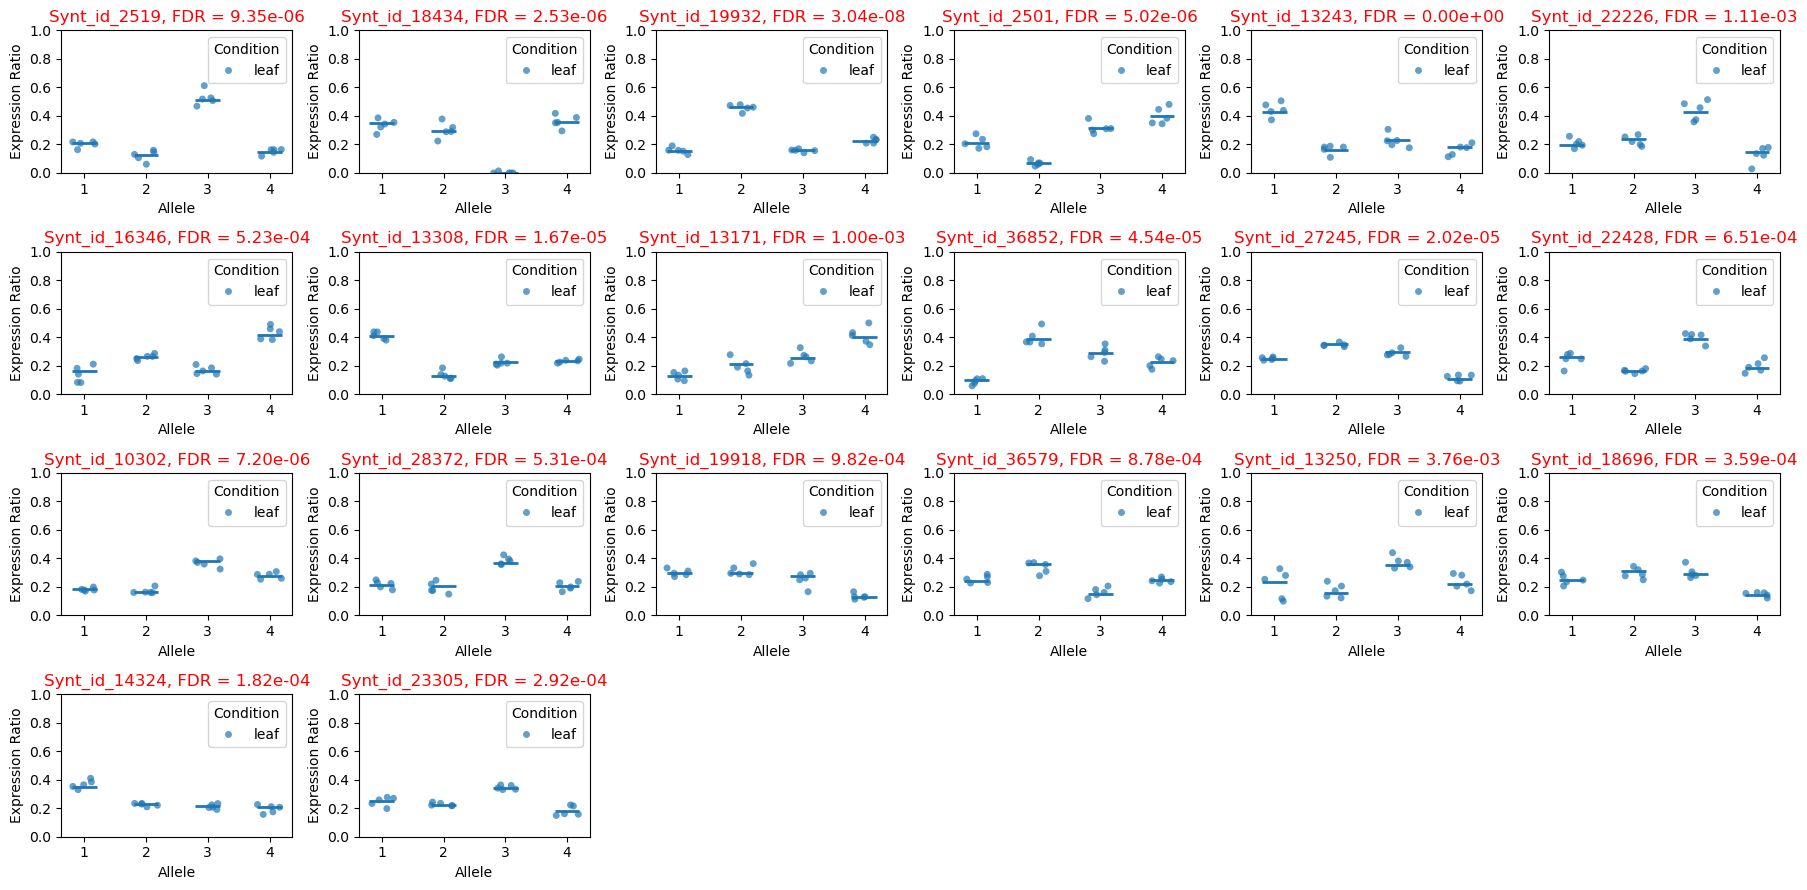

In [14]:
# select only the genes with equal lengths, low multimapping ratio and synteny category "1hap1_1hap2_1hap3_1hap4_s"
mask = (allelic_data_filtered.var["multimapping_ratio"] < 0.25) & (allelic_data_filtered.var["synteny_category"] == "1hap1_1hap2_1hap3_1hap4_s") & (allelic_data_filtered.var["CDS_haplotype_with_longest_annotation"] == "equal_lengths")
allelic_data_length_filter = allelic_data_filtered[:,mask].copy()

# 1. Test for differential allelic ratios withing conditions
results = test_allelic_ratios_within_conditions(allelic_data_length_filter, layer="unique_counts", test_condition= "leaf", inplace=True)

# 2. Get top differential syntelogs
top_results = get_top_differential_syntelogs(results, n=20, sort_by='ratio_difference', fdr_threshold=0.05, ratio_threshold=0.1)

# 3. Plot the results
fig = plot_top_differential_syntelogs(results, n = 20, figsize = (3*6, 3*3),sort_by='ratio_difference')


In [15]:
results

Synt_id allele               transcript_id       p_value  \
65   Synt_id_13243      2  Soltu.Atl_v3.03_2G020270.1  0.000000e+00   
165  Synt_id_19932      2  Soltu.Atl_v3.06_2G000620.2  1.634746e-10   
362   Synt_id_8999      3  Soltu.Atl_v3.02_3G020690.1  3.247799e-10   
166  Synt_id_19932      3  Soltu.Atl_v3.06_3G000610.3  2.155474e-08   
126  Synt_id_18434      3  Soltu.Atl_v3.05_3G010830.1  3.406273e-08   
..             ...    ...                         ...           ...   
209  Synt_id_24792      2  Soltu.Atl_v3.07_2G011560.1  1.000000e+00   
210  Synt_id_24792      3  Soltu.Atl_v3.07_3G014920.1  1.000000e+00   
5    Synt_id_10305      2  Soltu.Atl_v3.02_2G032150.3  1.000000e+00   
7    Synt_id_10305      4  Soltu.Atl_v3.02_4G023670.3  1.000000e+00   
79   Synt_id_13291      4  Soltu.Atl_v3.03_4G019390.2  1.000000e+00   

     ratio_difference  n_alleles  ratios_leaf_mean  \
65           0.091920          4          0.157955   
165          0.211535          4          0.461798   
362          0.091573          4          0.158435   
166          0.090985          4          0.159278   
126          0.247365          4          0.002078   
..                ...        ...               ...   
209          0.013332          4          0.262969   
210          0.001708          4          0.247929   
5            0.001866          4          0.247909   
7            0.000323          4          0.249452   
79           0.001067          4          0.247973   

                                       ratios_rep_leaf           FDR  
65   [0.18823529411764706, 0.18181818181818182, 0.1...  0.000000e+00  
165  [0.47874015748031495, 0.41786743515850144, 0.4...  3.040628e-08  
362  [0.15305371596762327, 0.15306122448979592, 0.1...  4.027270e-08  
166  [0.16062992125984252, 0.14121037463976946, 0.1...  2.004591e-06  
126         [0.014925373134328358, 0.0, 0.0, 0.0, 0.0]  2.534267e-06  
..                                                 ...           ...  
209  [0.2980132450331126, 0.30864197530864196, 0.25...  1.000000e+00  
210  [0.271523178807947, 0.2222222222222222, 0.2343...  1.000000e+00  
5    [0.3, 0.30434782608695654, 0.23706896551724138...  1.000000e+00  
7    [0.18, 0.30434782608695654, 0.2672413793103448...  1.000000e+00  
79   [0.22413793103448276, 0.20491803278688525, 0.2...  1.000000e+00  

[372 rows x 9 columns]

In [ ]:
# print results for transcript id "Soltu.Atl_v3.06_2G000620.2"
results[results["transcript_id"] == "Soltu.Atl_v3.06_2G000620"]


Synt_id allele             transcript_id       p_value  \
277  Synt_id_19932      2  Soltu.Atl_v3.06_2G000620  7.416543e-09   

     ratio_difference  n_alleles  ratios_tuber_mean  \
277          0.222101          4           0.472082   

                                      ratios_rep_tuber           FDR  
277  [0.45387453874538747, 0.45454545454545453, 0.4...  4.503865e-07

: 

In [ ]:
results[results["Synt_id"] == "Synt_id_19932"]

Synt_id allele             transcript_id       p_value  \
277  Synt_id_19932      2  Soltu.Atl_v3.06_2G000620  7.416543e-09   
276  Synt_id_19932      1  Soltu.Atl_v3.06_1G000450  1.934287e-06   
278  Synt_id_19932      3  Soltu.Atl_v3.06_3G000610  1.017857e-05   
279  Synt_id_19932      4  Soltu.Atl_v3.06_4G000620  1.747138e-01   

     ratio_difference  n_alleles  ratios_tuber_mean  \
277          0.222101          4           0.472082   
276          0.099162          4           0.150819   
278          0.099033          4           0.150948   
279          0.023776          4           0.226205   

                                      ratios_rep_tuber           FDR  
277  [0.45387453874538747, 0.45454545454545453, 0.4...  4.503865e-07  
276  [0.15498154981549817, 0.15384615384615385, 0.1...  4.168076e-05  
278  [0.15682656826568267, 0.19114219114219114, 0.1...  1.581229e-04  
279  [0.23431734317343172, 0.20046620046620048, 0.2...  3.826518e-01

: 

In [ ]:
# save results to file 
results.to_csv("/scratch/nadjafn/for_yuchao/atlantic/atlantic_allelic_ratios_results.tsv", sep="\t")


: 

The rows are the replicates and the columns are the alleic ratios for alleles

In [ ]:
allelic_data[:,allelic_data .var["Synt_id"] == "Synt_id_12702"].var

transcript_id  \
tname                                                    
Soltu.Atl_v3.03_1G018190.1  Soltu.Atl_v3.03_1G018190.1   
Soltu.Atl_v3.03_2G015340.1  Soltu.Atl_v3.03_2G015340.1   
Soltu.Atl_v3.03_3G023410.1  Soltu.Atl_v3.03_3G023410.1   
Soltu.Atl_v3.03_4G014180.1  Soltu.Atl_v3.03_4G014180.1   

                                             gene_id feature_type  \
tname                                                               
Soltu.Atl_v3.03_1G018190.1  Soltu.Atl_v3.03_1G018190   transcript   
Soltu.Atl_v3.03_2G015340.1  Soltu.Atl_v3.03_2G015340   transcript   
Soltu.Atl_v3.03_3G023410.1  Soltu.Atl_v3.03_3G023410   transcript   
Soltu.Atl_v3.03_4G014180.1  Soltu.Atl_v3.03_4G014180   transcript   

                                       transcript_id.1        Synt_id  \
tname                                                                   
Soltu.Atl_v3.03_1G018190.1  Soltu.Atl_v3.03_1G018190.1  Synt_id_12702   
Soltu.Atl_v3.03_2G015340.1  Soltu.Atl_v3.03_2G015340.1  Synt_id_12702   
Soltu.Atl_v3.03_3G023410.1  Soltu.Atl_v3.03_3G023410.1  Synt_id_12702   
Soltu.Atl_v3.03_4G014180.1  Soltu.Atl_v3.03_4G014180.1  Synt_id_12702   

                                     synteny_category  \
tname                                                   
Soltu.Atl_v3.03_1G018190.1  1hap1_1hap2_1hap3_1hap4_s   
Soltu.Atl_v3.03_2G015340.1  1hap1_1hap2_1hap3_1hap4_s   
Soltu.Atl_v3.03_3G023410.1  1hap1_1hap2_1hap3_1hap4_s   
Soltu.Atl_v3.03_4G014180.1  1hap1_1hap2_1hap3_1hap4_s   

                                                               syntenic_genes  \
tname                                                                           
Soltu.Atl_v3.03_1G018190.1  Soltu.Atl_v3.03_1G018190.1,Soltu.Atl_v3.03_2G0...   
Soltu.Atl_v3.03_2G015340.1  Soltu.Atl_v3.03_1G018190.1,Soltu.Atl_v3.03_2G0...   
Soltu.Atl_v3.03_3G023410.1  Soltu.Atl_v3.03_1G018190.1,Soltu.Atl_v3.03_2G0...   
Soltu.Atl_v3.03_4G014180.1  Soltu.Atl_v3.03_1G018190.1,Soltu.Atl_v3.03_2G0...   

                           haplotype CDS_length_category  \
tname                                                      
Soltu.Atl_v3.03_1G018190.1      hap1  less_1%_difference   
Soltu.Atl_v3.03_2G015340.1      hap2  less_1%_difference   
Soltu.Atl_v3.03_3G023410.1      hap3  less_1%_difference   
Soltu.Atl_v3.03_4G014180.1      hap4  less_1%_difference   

                            CDS_percent_difference  \
tname                                                
Soltu.Atl_v3.03_1G018190.1                     0.0   
Soltu.Atl_v3.03_2G015340.1                     0.0   
Soltu.Atl_v3.03_3G023410.1                     0.0   
Soltu.Atl_v3.03_4G014180.1                     0.0   

                           CDS_haplotype_with_longest_annotation  
tname                                                             
Soltu.Atl_v3.03_1G018190.1                         equal_lengths  
Soltu.Atl_v3.03_2G015340.1                         equal_lengths  
Soltu.Atl_v3.03_3G023410.1                         equal_lengths  
Soltu.Atl_v3.03_4G014180.1                         equal_lengths

: 

Which of the alleles is the longest in the annotation? And which one with the highest allelic ratio?

Lets also look at the annotation in the [genome browser](https://spuddb.uga.edu/jb2/?session=share-Q7AqVFDKBg&password=OioEy) 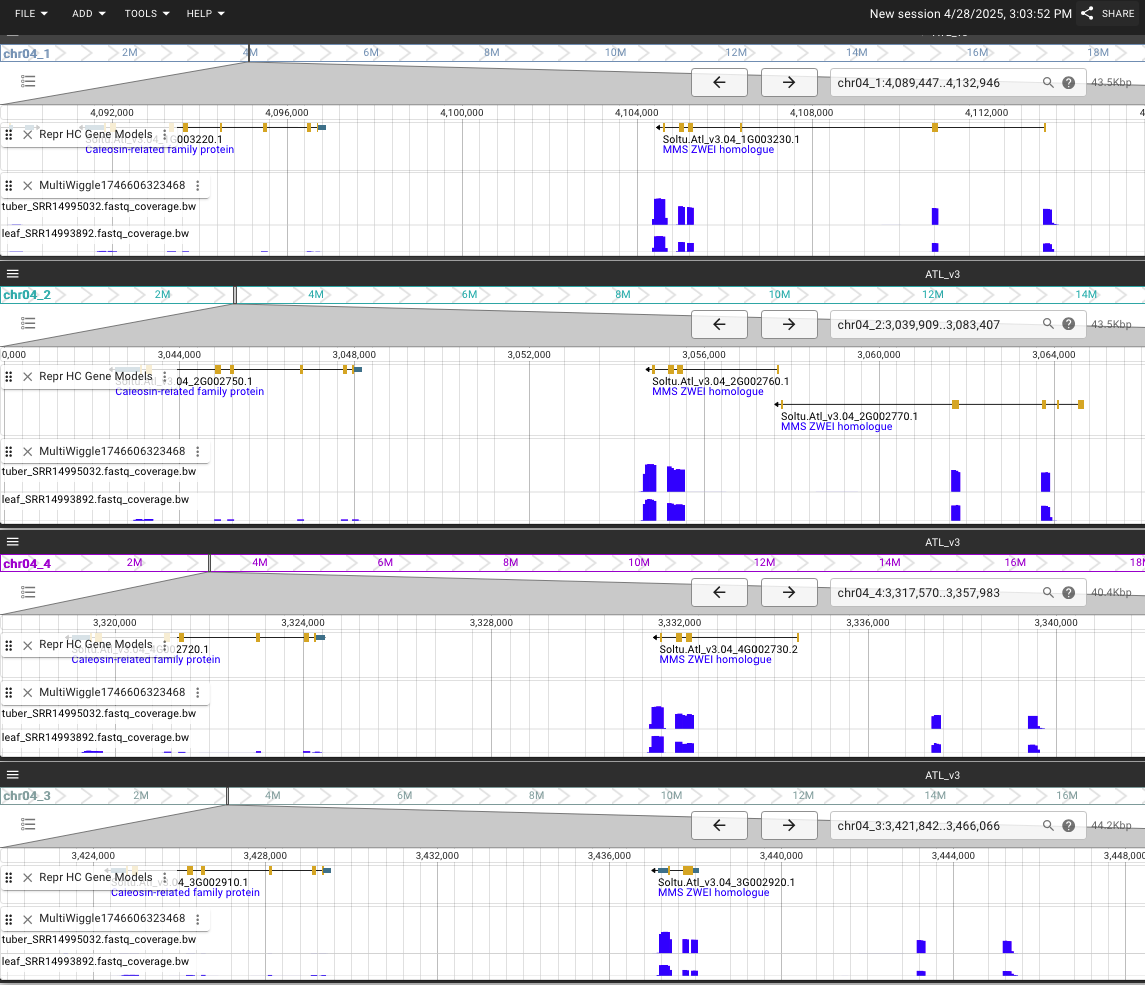

Should we compare the expression of these alleles?

## Alleles with same CDS length

To avoid annotation errors to bias the results, we will only look at alleles that have the same length on all haplotypes


https://spuddb.uga.edu/jb2/?session=share-XWreWcRKES&password=cAo2R

In [ ]:
# filter transcripts that are not equal lengths
mask = allelic_data.var["CDS_haplotype_with_longest_annotation"] == "equal_lengths"
allelic_data_length_filter = allelic_data[:,mask].copy()
plot_allelic_ratios(
    allelic_data_length_filter,
    synteny_category="1hap1_1hap2_1hap3_1hap4_s", 
    sample='all', 
    ratio_type="unique",
    figsize = (3,3),
    kde = True,
    multimapping_threshold=0.25
)

KeyError: 'multimapping_ratio'

: 

# 3) Testing for allelic imbalance

Now that we have the count per allele and filtered genes that could be biased by high number of ambgious reads and length differences, we want to test if there are genens that have unbalanced allelic expression (> or < than 0.25).

The test is implemented as a likelihood ratio test, based on beta-binomial model of the observed read counts. It's the test from [Isotools](https://isotools.readthedocs.io/en/latest/notebooks/09_diff_splice.html)

Found 9 from 57 syntelogs with at least one significantly different allele (FDR < 0.005 and ratio difference > 0.05)


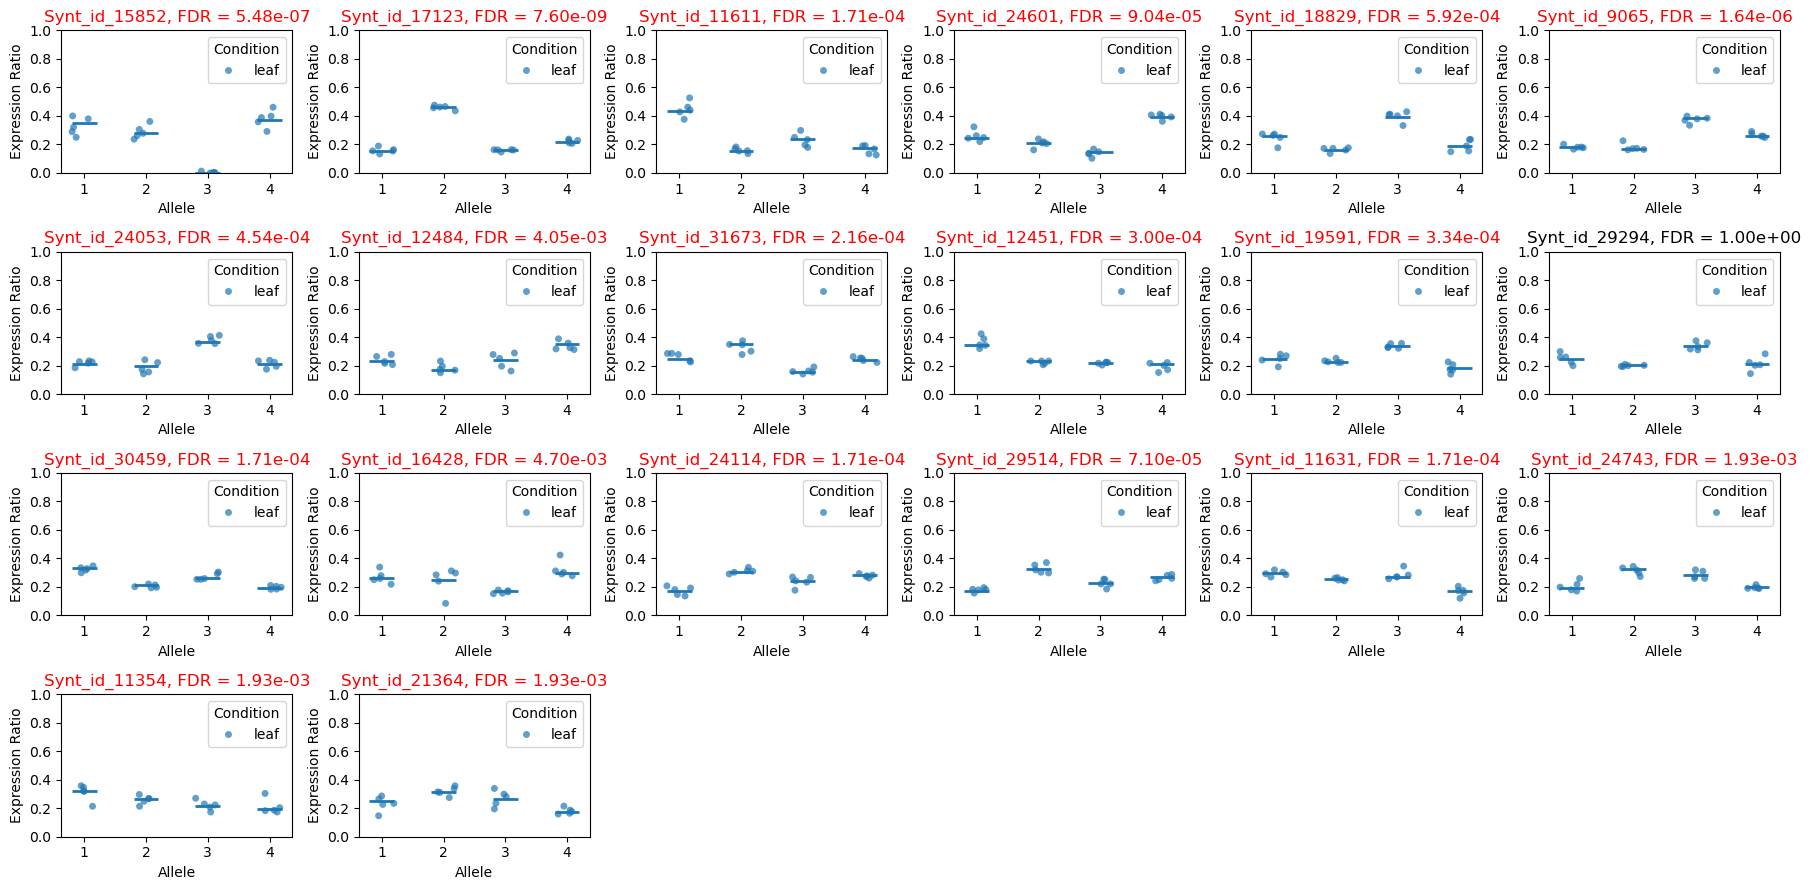

: 

In [ ]:
# select only the genes with equal lengths, low multimapping ratio and synteny category "1hap1_1hap2_1hap3_1hap4_s"
mask = (allelic_data.var["CDS_haplotype_with_longest_annotation"] == "equal_lengths" ) & (allelic_data.var["multimapping_ratio"] < 0.25) & (allelic_data.var["synteny_category"] == "1hap1_1hap2_1hap3_1hap4_s")
allelic_data_length_filter = allelic_data[:,mask].copy()

# 1. Test for differential allelic ratios withing conditions
results = test_allelic_ratios_within_conditions(allelic_data_length_filter, layer="unique_counts", test_condition= "leaf", inplace=True)

# 2. Get top differential syntelogs
top_results = get_top_differential_syntelogs(results, n=20, sort_by='ratio_difference', fdr_threshold=0.05, ratio_threshold=0.1)

# 3. Plot the results
fig = plot_top_differential_syntelogs(results, n = 20, figsize = (3*6, 3*3),sort_by='ratio_difference')
plt.show()

### Read in vcf file from promotor comparison of Synt_15852


['promoter_Soltu.Atl_v3.06_1G000450.1', 'promoter_Soltu.Atl_v3.06_2G000620.2', 'promoter_Soltu.Atl_v3.06_3G000610.3', 'promoter_Soltu.Atl_v3.06_4G000620.1']
                                 chrom   end svtype  svlen  \
0  promoter_Soltu.Atl_v3.06_1G000450.1   462    INS    355   
1  promoter_Soltu.Atl_v3.06_1G000450.1  2818    INS     23   
2  promoter_Soltu.Atl_v3.06_1G000450.1  2319    DEL    -28   
3  promoter_Soltu.Atl_v3.06_1G000450.1  1781    INS     52   
4  promoter_Soltu.Atl_v3.06_1G000450.1  1189    DEL    -21   

                                 reads strand  promlen  start  
0  promoter_Soltu.Atl_v3.06_2G000620.2      -     2999    107  
1  promoter_Soltu.Atl_v3.06_3G000610.3      -     2999   2795  
2  promoter_Soltu.Atl_v3.06_3G000610.3      -     2999   2347  
3  promoter_Soltu.Atl_v3.06_4G000620.1      -     2999   1729  
4  promoter_Soltu.Atl_v3.06_4G000620.1      -     2999   1210  


[W::vcf_parse_info] INFO 'SVTYPE' is not defined in the header, assuming Type=String
[W::vcf_parse_info] INFO 'END' is not defined in the header, assuming Type=String
[W::vcf_parse_info] INFO 'SVLEN' is not defined in the header, assuming Type=String
[W::vcf_parse_info] INFO 'READS' is not defined in the header, assuming Type=String
[W::vcf_parse_info] INFO 'PROMLEN' is not defined in the header, assuming Type=String
[W::vcf_parse_format_dict2] FORMAT 'GT' at promoter_Soltu.Atl_v3.06_1G000450.1:2538 is not defined in the header, assuming Type=String


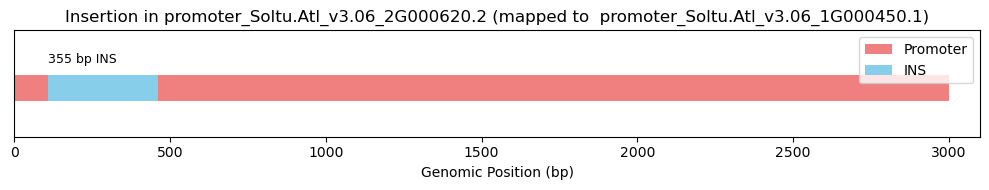

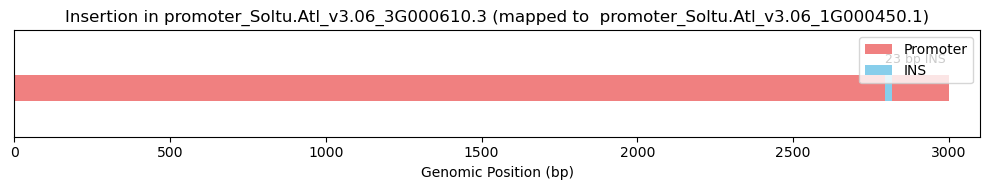

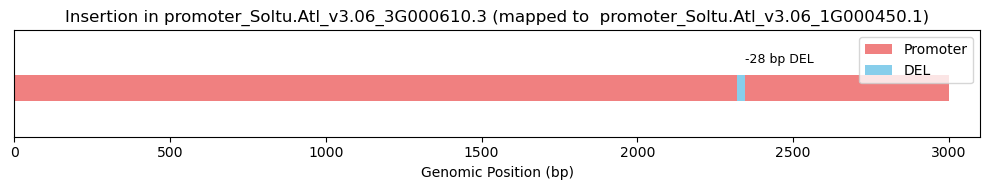

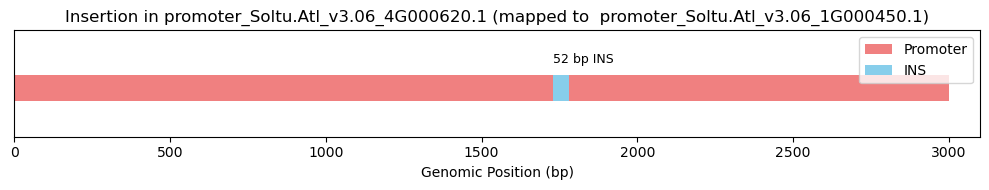

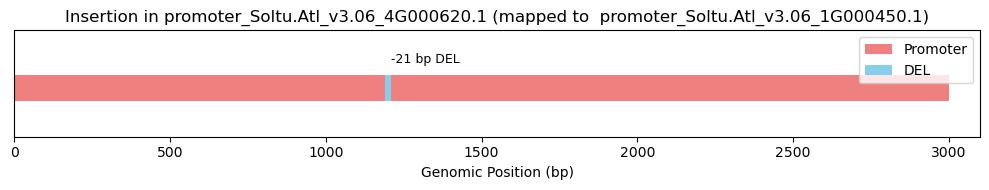

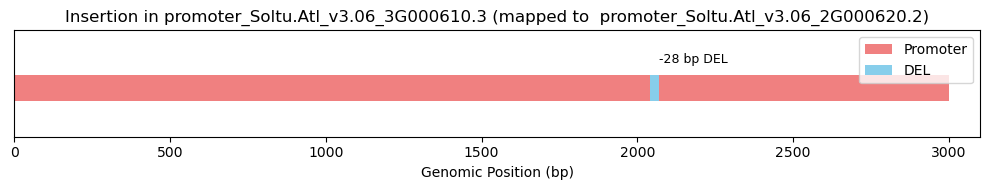

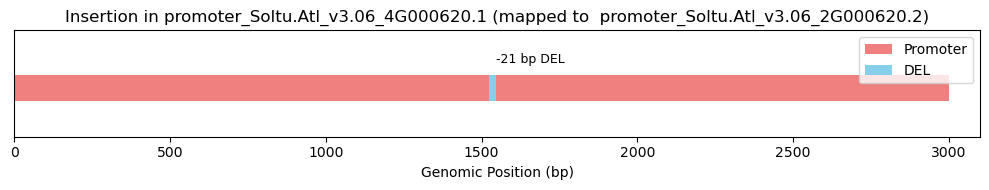

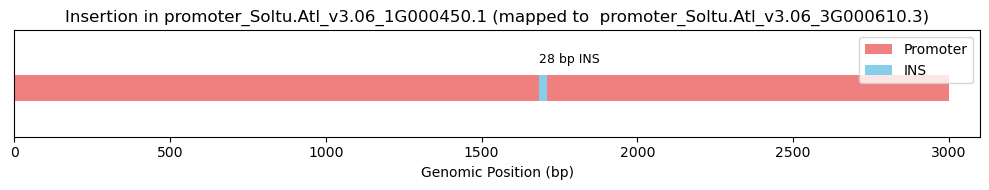

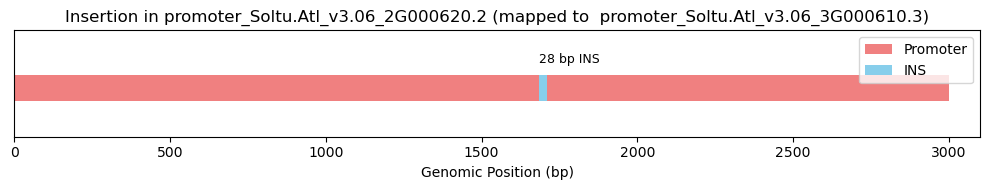

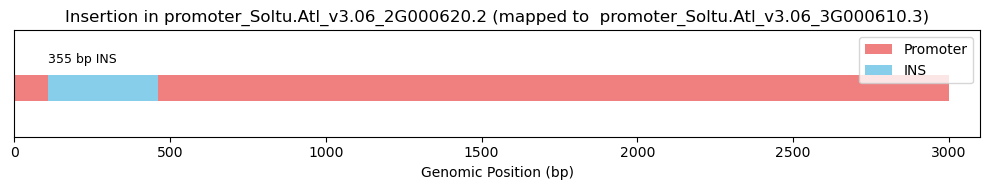

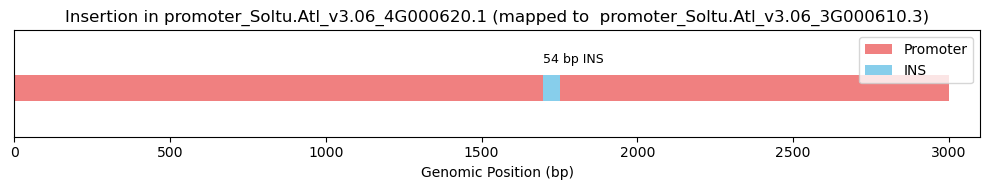

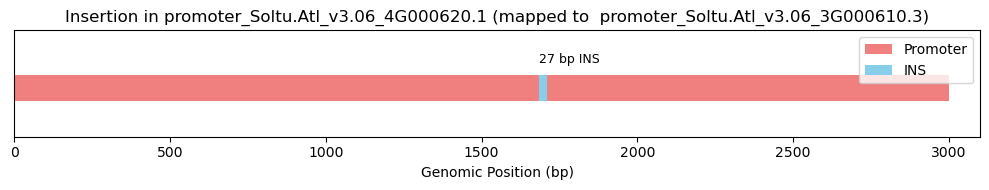

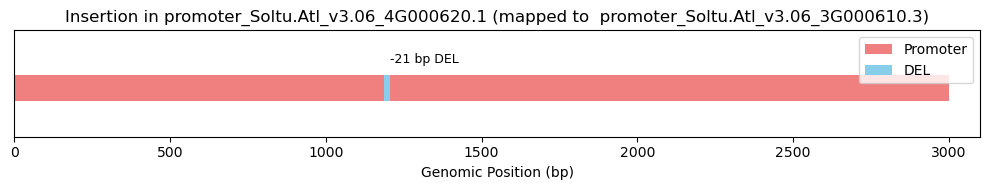

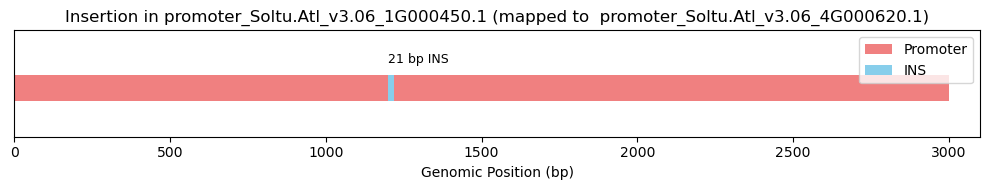

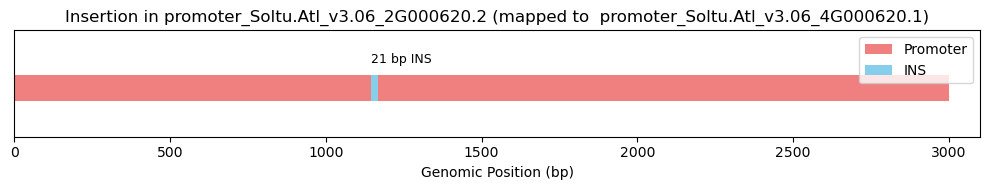

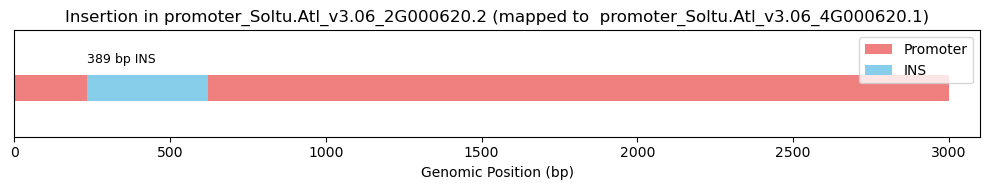

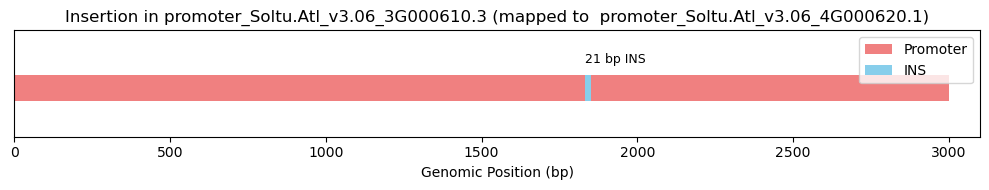

: 

In [ ]:

import pysam
import pandas as pd

read_list = []
type_list = []
end_list = []
length_list = []
record_list = []
sv_strand = []
prom_length = []

vcf_in = pysam.VariantFile("/scratch/nadjafn/test_PROMOTOR_analysis/pairwise_test_Synt_id_17123/all_variants_stranded.vcf", "r")  # open for reading
contig_list = list(vcf_in.header.contigs)
print(contig_list)
for record in vcf_in:
    record_list.append(record.chrom)
    read_list.append(record.info.get("READS", []))     # Use .get to avoid KeyError
    type_list.append(record.info.get("SVTYPE", "NA"))
    length_list.append(record.info.get("SVLEN")) 
    sv_strand.append(record.info.get("SVSTRAND")) 
    prom_length.append(record.info.get("PROMLEN")) 
    end_list.append(record.stop)

# Create DataFrame
df = pd.DataFrame({
    "chrom": record_list,
    "end": end_list,
    "svtype": type_list,
    "svlen": length_list,
    "reads": read_list,
    "strand": sv_strand,
    "promlen": prom_length
})


#print(df.head())

df["end"] = 3000 - (df["end"].astype(int))
df["svlen"] = df["svlen"].astype(int)
df["start"] = df["end"] - df["svlen"]
df["promlen"] = (df["promlen"].astype(int))
print(df.head())

# filter for min sv len
df = df[abs(df["svlen"]) > 10]


# Group by the 'reads' column
grouped = df.groupby('reads')

# Get summary statistics for each group:
summary = df.groupby('reads').agg({
    'chrom': list,  # Count of variants
    'svlen': list,  # SV length stats
    'strand': 'first',  # Get strand (assuming same for all variants of a read)
    'start': list,  # Position range
    'svtype': set,

})


import re

def create_concise_summary(df):
    """
    Create concise summary columns for SV data.

    Returns:
        DataFrame with 'concise_summary' and 'concise_summary_2' columns.
    """

    def generate_concise(row):
        chrom = row['chrom']
        sv_type = row['svtype']
        sv_length = row['svlen']
        strand = row['strand']
        start_pos = row['start']
        
        # If row.name is a string like a read name, extract allele ID
        read_name = str(row.name)
        allele_read_id_match = re.search(r'(\d+G)', read_name)
        allele_read_id = allele_read_id_match.group(1) if allele_read_id_match else "NA"

        # Extract gene ID from chrom string
        matches = [re.search(r'(\d+G)', chr_str) for chr_str in chrom]
        allele_ids = [m.group(1) if m else 'NA' for m in matches]
        allele_id = ','.join(allele_ids)  # or pick the first one: allele_ids[0]    

        # Compose summaries
        concise = f"{sv_type}:{sv_length}bp@{allele_id}:{start_pos}({strand})"
        concise_2 = f"{allele_read_id}{sv_type}_{allele_id}"

        return pd.Series([concise, concise_2])

    # Apply function and create new columns
    df[['concise_summary', 'concise_summary_2']] = df.apply(generate_concise, axis=1)

    return df

concise_summary = create_concise_summary(summary)

import matplotlib.pyplot as plt

# Select the first row
for row_num in range(len(df)):
    row = df.iloc[row_num]

    # Plot setup
    fig, ax = plt.subplots(figsize=(10, 2))

    # Draw promoter background as a red bar (e.g., 0–3000 bp region)
    ax.broken_barh([(0, row['promlen'])], (0.4, 0.3), facecolors='lightcoral', label='Promoter')

    # Draw insertion within the promoter as a blue bar
    ax.broken_barh([(row["start"], row["svlen"])], (0.4, 0.3), facecolors='skyblue', label=row["svtype"])

    # Annotate the insertion with its length
    ax.text(row["start"], 0.8, f'{row["svlen"]} bp {row["svtype"]}', va='bottom', ha='left', fontsize=9)

    # add the gene position, depending on the strand info

    # Axis settings
    ax.set_xlim(0, 3100)
    ax.set_ylim(0, 1.2)
    ax.set_xlabel("Genomic Position (bp)")
    ax.set_yticks([])
    ax.set_title(f'Insertion in {row["reads"]} (mapped to  {row["chrom"]})')

    # Legend
    ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


In [ ]:
concise_summary

chrom  \
reads                                                                                    
promoter_Soltu.Atl_v3.06_2G000620.2  [promoter_Soltu.Atl_v3.06_1G000450.1, promoter...   
promoter_Soltu.Atl_v3.06_4G000620.1  [promoter_Soltu.Atl_v3.06_1G000450.1, promoter...   

                                               svlen strand            start  \
reads                                                                          
promoter_Soltu.Atl_v3.06_2G000620.2  [355, 355, 389]      -  [107, 107, 233]   
promoter_Soltu.Atl_v3.06_4G000620.1         [52, 54]      -     [1729, 1696]   

                                    svtype  \
reads                                        
promoter_Soltu.Atl_v3.06_2G000620.2  {INS}   
promoter_Soltu.Atl_v3.06_4G000620.1  {INS}   

                                                                       concise_summary  \
reads                                                                                    
promoter_Soltu.Atl_v3.06_2G000620.2  {'INS'}:[355, 355, 389]bp@1G,3G,4G:[107, 107, ...   
promoter_Soltu.Atl_v3.06_4G000620.1           {'INS'}:[52, 54]bp@1G,3G:[1729, 1696](-)   

                                      concise_summary_2  
reads                                                    
promoter_Soltu.Atl_v3.06_2G000620.2  2G{'INS'}_1G,3G,4G  
promoter_Soltu.Atl_v3.06_4G000620.1     4G{'INS'}_1G,3G

: 

: 

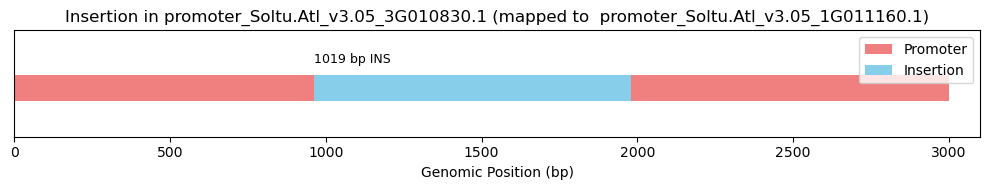

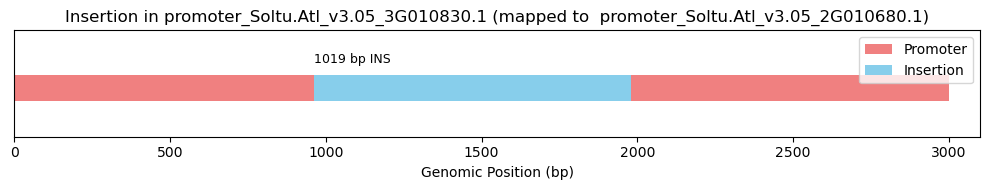

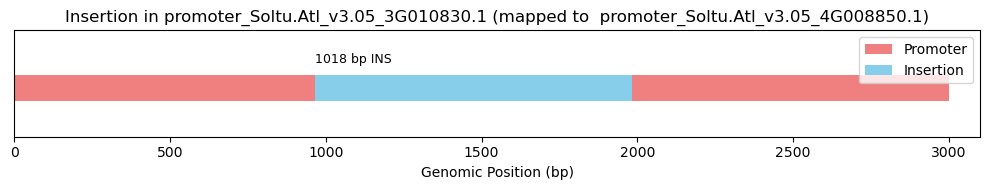

: 

In [ ]:
import matplotlib.pyplot as plt

# Select the first row
for row_num in range(len(df)):
    row = df.iloc[row_num]

    # Plot setup
    fig, ax = plt.subplots(figsize=(10, 2))

    # Draw promoter background as a red bar (e.g., 0–3000 bp region)
    ax.broken_barh([(0, row['promlen'])], (0.4, 0.3), facecolors='lightcoral', label='Promoter')

    # Draw insertion within the promoter as a blue bar
    ax.broken_barh([(row["start"], row["svlen"])], (0.4, 0.3), facecolors='skyblue', label='Insertion')

    # Annotate the insertion with its length
    ax.text(row["start"], 0.8, f'{row["svlen"]} bp INS', va='bottom', ha='left', fontsize=9)

    # add the gene position, depending on the strand info

    # Axis settings
    ax.set_xlim(0, 3100)
    ax.set_ylim(0, 1.2)
    ax.set_xlabel("Genomic Position (bp)")
    ax.set_yticks([])
    ax.set_title(f'Insertion in {row["reads"]} (mapped to  {row["chrom"]})')

    # Legend
    ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


In [ ]:
summary

chrom  \
reads                                                                                    
promoter_Soltu.Atl_v3.05_3G010830.1  [promoter_Soltu.Atl_v3.05_1G011160.1, promoter...   

                                                  svlen strand  \
reads                                                            
promoter_Soltu.Atl_v3.05_3G010830.1  [1019, 1019, 1018]      +   

                                               start svtype  \
reads                                                         
promoter_Soltu.Atl_v3.05_3G010830.1  [962, 962, 964]  {INS}   

                                                                       concise_summary  \
reads                                                                                    
promoter_Soltu.Atl_v3.05_3G010830.1  {'INS'}:[1019, 1019, 1018]bp@1G,2G,4G:[962, 96...   

                                       concise_summary_2  
reads                                                     
promoter_Soltu.Atl_v3.05_3G010830.1  3G{'INS'}:1G,2G,4G:

: 

In [ ]:
#record.contig
record.chrom

'promoter_Soltu.Atl_v3.05_4G008850.1'

: 

In [ ]:
#record.start
record.stop

1982

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import matplotlib as mpl

def create_blue_white_red_cmap(name='blue_white_red', white_range=(0.2, 0.3)):
    """
    Create a custom colormap with blue for low values, white in the middle range,
    and red for high values.
    
    Parameters:
    -----------
    name : str
        Name of the colormap
    white_range : tuple
        Range of values (from 0 to 1) where the color should be white
        
    Returns:
    --------
    cmap : LinearSegmentedColormap
        The custom colormap
    """
    # Ensure white_range values are between 0 and 1
    lower_white = max(0, min(1, white_range[0]))
    upper_white = max(0, min(1, white_range[1]))
    
    # Create color segments
    # From 0 to lower_white: blue to white
    # From lower_white to upper_white: white
    # From upper_white to 1: white to red
    
    # Define the colors at specific positions
    colors = [
        (0.0, (0.0, 0.0, 0.8)),      # Dark blue at 0.0
        (lower_white, (1.0, 1.0, 1.0)),  # White at lower_white
        (upper_white, (1.0, 1.0, 1.0)),  # White at upper_white
        (1.0, (0.8, 0.0, 0.0))       # Dark red at 1.0
    ]
    
    # Create the colormap
    cmap = LinearSegmentedColormap.from_list(name, colors)
    
    return cmap


: 

In [ ]:
my_cmap = create_blue_white_red_cmap(name='blue_white_red', white_range=(0.22, 0.27))

: 

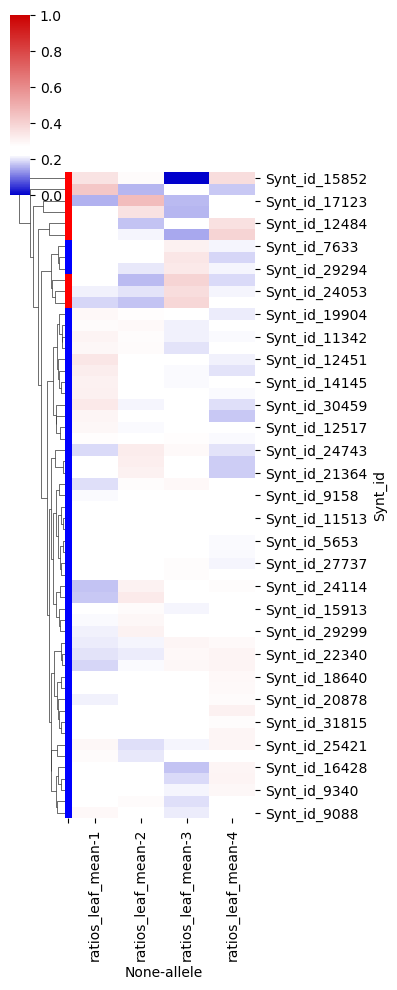

: 

In [ ]:
import seaborn as sns
results["significant"] = (results["FDR"] < 0.05) & (results["ratio_difference"] > 0.1)
glue = results.pivot(index="Synt_id", columns="allele", values=["ratios_leaf_mean"])
sig = results.pivot(index="Synt_id", columns="allele", values=["significant"]).mean(axis=1)
sig["significant"] = sig > 0
row_colors = sig["significant"].map({True: "red", False: "blue"})

# ,
sns.clustermap(glue, cmap=my_cmap, col_cluster= False, row_cluster= True, row_colors=row_colors, figsize=(4, 10
                                                                                                          ), vmin = 0, vmax = 1)
# remove y tick labels




In [ ]:
df = allelic_data[:,allelic_data .var["Synt_id"] == "Synt_id_17123"].layers['unique_counts']
pd.DataFrame(data= df, index = allelic_data[:,allelic_data .var["Synt_id"] == "Synt_id_17123"].obs.index, columns = allelic_data[:,allelic_data .var["Synt_id"] == "Synt_id_17123"].var_names)

transcript_id  Soltu.Atl_v3.06_4G000620.1  Soltu.Atl_v3.06_3G000610.3  \
SRR14993892                         171.0                       117.0   
SRR14993893                          87.0                        56.0   
SRR14993894                         785.0                       554.0   
SRR14993895                         359.0                       277.0   
SRR14996168                         511.0                       400.0   
SRR14995031                         144.0                        98.0   
SRR14995032                          92.0                        86.0   
SRR14995033                         155.0                        88.0   
SRR14995034                          89.0                        57.0   
SRR14995933                          89.0                        57.0   

transcript_id  Soltu.Atl_v3.06_1G000450.1  Soltu.Atl_v3.06_2G000620.2  
SRR14993892                          96.0                       335.0  
SRR14993893                          72.0                       166.0  
SRR14993894                         531.0                      1572.0  
SRR14993895                         278.0                       785.0  
SRR14996168                         382.0                      1171.0  
SRR14995031                          95.0                       274.0  
SRR14995032                          74.0                       210.0  
SRR14995033                          98.0                       315.0  
SRR14995034                          66.0                       178.0  
SRR14995933                          49.0                       198.0

: 

### Lets look at the gene with "Synt_id_17123" in more detail:

In [ ]:
results[results["Synt_id"] == "Synt_id_17123"]

Synt_id allele               transcript_id       p_value  \
71  Synt_id_17123      2  Soltu.Atl_v3.06_2G000620.2  3.332783e-11   
69  Synt_id_17123      3  Soltu.Atl_v3.06_3G000610.3  7.212484e-09   
70  Synt_id_17123      1  Soltu.Atl_v3.06_1G000450.1  8.571664e-08   
68  Synt_id_17123      4  Soltu.Atl_v3.06_4G000620.1  1.950837e-03   

    ratio_difference  n_alleles  ratios_leaf_mean  \
71          0.212934          4          0.462873   
69          0.088604          4          0.161335   
70          0.093830          4          0.156109   
68          0.030176          4          0.219763   

                                      ratios_rep_leaf           FDR  \
71  [0.4659248956884562, 0.4356955380577428, 0.456...  7.598745e-09   
69  [0.1627260083449235, 0.14698162729658792, 0.16...  5.481488e-07   
70  [0.13351877607788595, 0.1889763779527559, 0.15...  3.908679e-06   
68  [0.23783031988873435, 0.2283464566929134, 0.22...  8.392280e-03   

    significant  
71         True  
69        False  
70        False  
68        False

: 

In [ ]:
results[results["Synt_id"] == "Synt_id_11611"]

Synt_id allele               transcript_id   p_value  \
15  Synt_id_11611      1  Soltu.Atl_v3.03_1G022650.1  0.000010   
13  Synt_id_11611      2  Soltu.Atl_v3.03_2G020270.1  0.000216   
14  Synt_id_11611      4  Soltu.Atl_v3.03_4G018940.1  0.000771   
12  Synt_id_11611      3  Soltu.Atl_v3.03_3G028240.1  0.380760   

    ratio_difference  n_alleles  ratios_leaf_mean  \
15          0.181527          4          0.432097   
13          0.093857          4          0.156712   
14          0.076740          4          0.173830   
12          0.014277          4          0.236293   

                                      ratios_rep_leaf       FDR  significant  
15  [0.5263157894736842, 0.46153846153846156, 0.44...  0.000171         True  
13  [0.16842105263157894, 0.15384615384615385, 0.1...  0.001493        False  
14  [0.12631578947368421, 0.1346153846153846, 0.16...  0.004286        False  
12  [0.17894736842105263, 0.25, 0.2342569269521410...  0.549452        False

: 

Lets look at the expression for these alleles in the genome Browser https://spuddb.uga.edu/jb2/?session=share-y51Gk46x4-&password=RWDWO

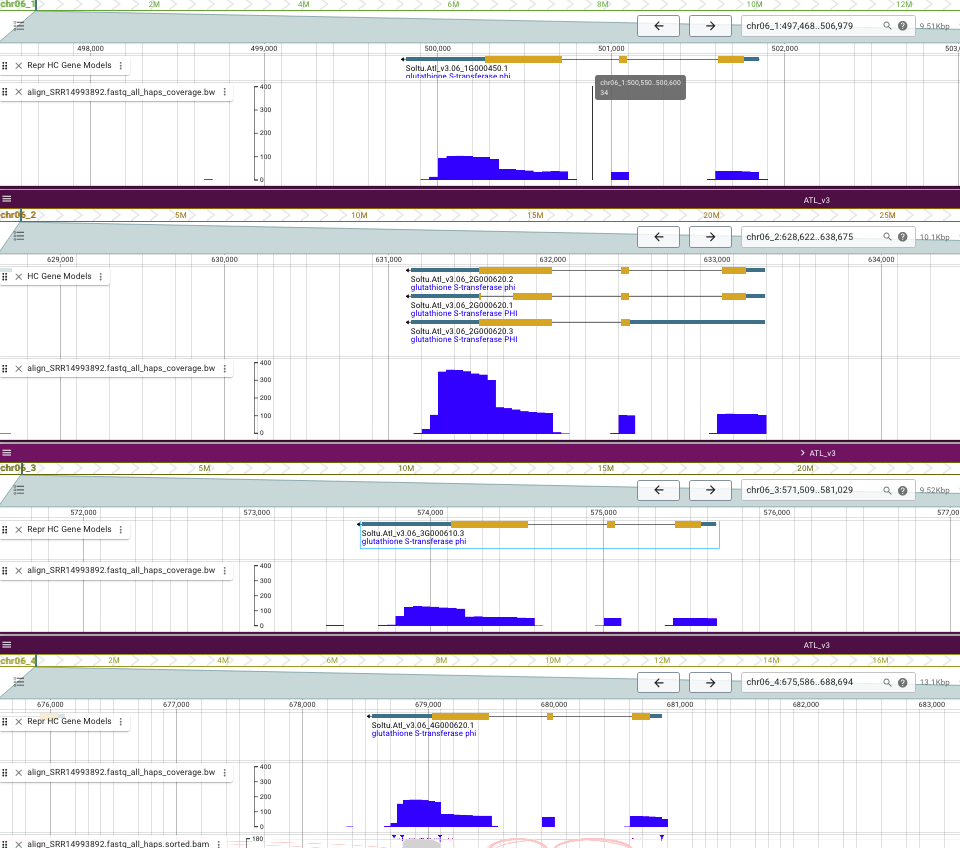

Why is the allele 2 of gluthadione S-transferase hihger expressed than the other alleles?

## Cis reulatory element? Promotor analysis?

We look at the promotor region (500 bp upstream of the CDS start)

[digaling](https://www.genome.jp/digalign/u/5eZ13FJaq_zJA1wC7Q7ORA/aln/chr06_1_501767-502776/chr06_2_633175-634170/chr06_3_575575-576598/chr06_4_680760-681844/chr06_1_501767-502776/chr06_3_575575-576598?autopos_flag=off&show_labels=on&label_angle=0&gene_tooltip=on&percent_thre_mode=default&percent_thre_customize=&blast_tooltip=on&color_mode=default&color_mode_customize=&vertical=off&show_ticks=on&show_dashed_lines=on&blast_idt_thre=0&blast_scr_thre=0&blast_len_thre=0&scale=5&v_span=160&tick_span=0.5&grid_span=1&fontfamily=Times%20new%20roman&fontsize=14&fontweight=bold&cutpos1=0&offset1=0&strand1=forward&cutpos2=0&offset2=0&strand2=forward&cutpos3=0&offset3=0&strand3=forward&cutpos4=0&offset4=0&strand4=forward&cutpos5=0&offset5=0&strand5=forward&cutpos6=0&offset6=0&strand6=forward)

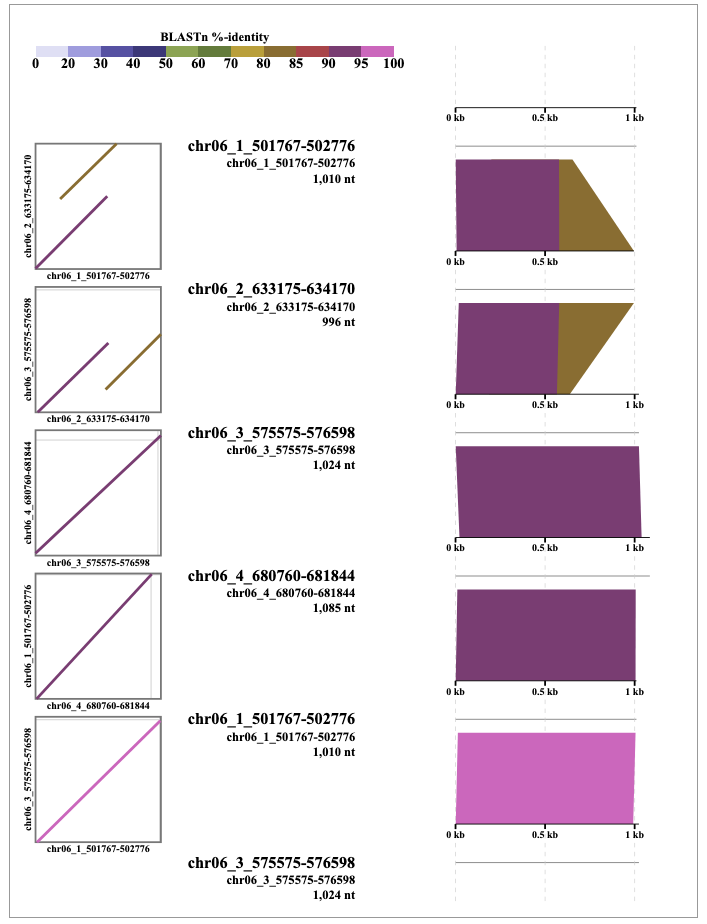

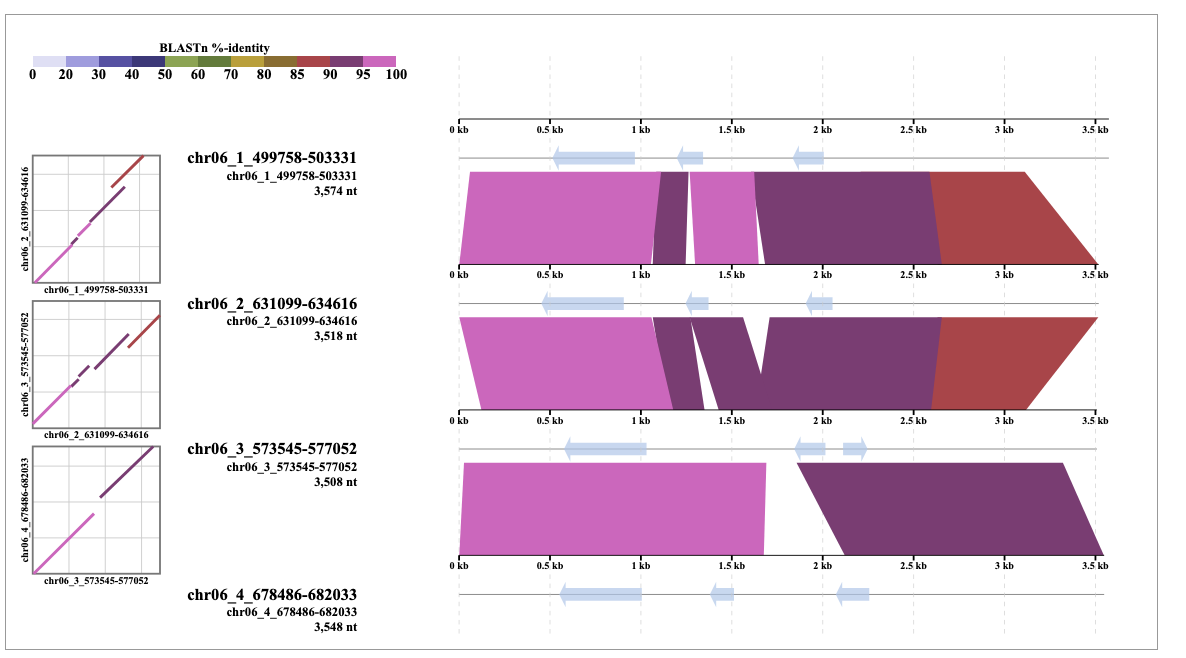

https://www.genome.jp/digalign/u/53kR88J_Pi7hkta3z3hB_w/aln/chr06_1_499758-503331/chr06_2_631099-634616/chr06_3_573545-577052/chr06_4_678486-682033


### We also want to look at the genes with no difference in expession

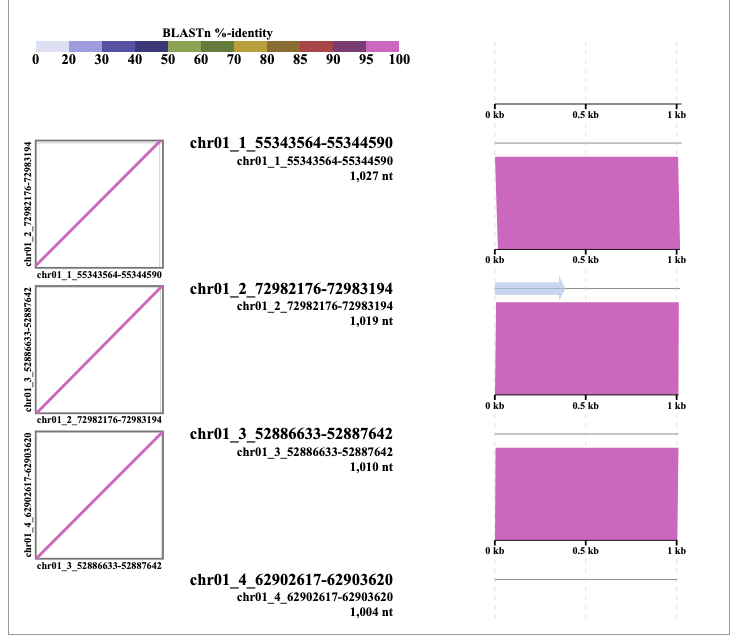

In [ ]:
results.groupby('Synt_id').max("ratio_difference").sort_values(by='ratio_difference', ascending= True).head(20)
results[results["Synt_id"] == "Synt_id_5776"]

Synt_id allele               transcript_id  p_value  \
176  Synt_id_5776      3  Soltu.Atl_v3.01_3G030290.1      1.0   
179  Synt_id_5776      4  Soltu.Atl_v3.01_4G032390.1      1.0   
178  Synt_id_5776      1  Soltu.Atl_v3.01_1G028730.1      1.0   
177  Synt_id_5776      2  Soltu.Atl_v3.01_2G034660.1      1.0   

     ratio_difference  n_alleles  ratios_leaf_mean  \
176          0.005681          4          0.244358   
179          0.007008          4          0.257048   
178          0.001948          4          0.248091   
177          0.004567          4          0.245473   

                                       ratios_rep_leaf  FDR  significant  
176  [0.2643171806167401, 0.2833333333333333, 0.231...  1.0        False  
179  [0.23348017621145375, 0.225, 0.288706058339566...  1.0        False  
178  [0.2775330396475771, 0.25, 0.23784592370979807...  1.0        False  
177  [0.22466960352422907, 0.24166666666666667, 0.2...  1.0        False

: 

In [ ]:
#results.groupby('Synt_id').max("ratio_difference").sort_values(by='ratio_difference', ascending= True).head(20)

df = allelic_data[:,allelic_data .var["Synt_id"] == "Synt_id_15852"].layers['unique_counts']
#print(pd.DataFrame(data= df, index = allelic_data[:,allelic_data .var["Synt_id"] == "Synt_id_15852"].obs.index, columns = allelic_data[:,allelic_data .var["Synt_id"] == "Synt_id_15852"].var_names))
allelic_data[:,allelic_data .var["Synt_id"] == "Synt_id_15852"].var

Synt_id           synteny_category  \
transcript_id                                                          
Soltu.Atl_v3.05_2G010680.1  Synt_id_15852  1hap1_1hap2_1hap3_1hap4_s   
Soltu.Atl_v3.05_1G011160.1  Synt_id_15852  1hap1_1hap2_1hap3_1hap4_s   
Soltu.Atl_v3.05_3G010830.1  Synt_id_15852  1hap1_1hap2_1hap3_1hap4_s   
Soltu.Atl_v3.05_4G008850.1  Synt_id_15852  1hap1_1hap2_1hap3_1hap4_s   

                           CDS_haplotype_with_longest_annotation  \
transcript_id                                                      
Soltu.Atl_v3.05_2G010680.1                         equal_lengths   
Soltu.Atl_v3.05_1G011160.1                         equal_lengths   
Soltu.Atl_v3.05_3G010830.1                         equal_lengths   
Soltu.Atl_v3.05_4G008850.1                         equal_lengths   

                           CDS_length_category mismatch_category  mismatch  \
transcript_id                                                                
Soltu.Atl_v3.05_2G010680.1  less_1%_difference              SNPs      13.0   
Soltu.Atl_v3.05_1G011160.1  less_1%_difference              SNPs      13.0   
Soltu.Atl_v3.05_3G010830.1  less_1%_difference              SNPs      13.0   
Soltu.Atl_v3.05_4G008850.1  less_1%_difference              SNPs      13.0   

                            multimapping_ratio  
transcript_id                                   
Soltu.Atl_v3.05_2G010680.1            0.140301  
Soltu.Atl_v3.05_1G011160.1            0.140301  
Soltu.Atl_v3.05_3G010830.1            0.140301  
Soltu.Atl_v3.05_4G008850.1            0.140301

: 

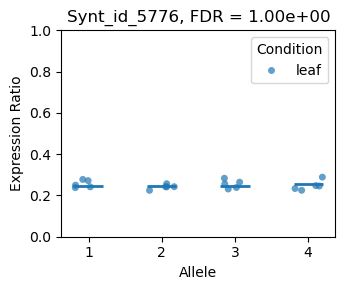

: 

In [ ]:
# sort results by ratio_difference smallest first
results.sort_values(by='ratio_difference', ascending= True).groupby('Synt_id')

non_sig_results = results.sort_values(by='FDR', ascending= False).sort_values(by="Synt_id").head(16)

# 3. Plot the results
fig = plot_top_differential_syntelogs(results[results["Synt_id"] == "Synt_id_5776"], figsize=(6*3, 3))
plt.show()

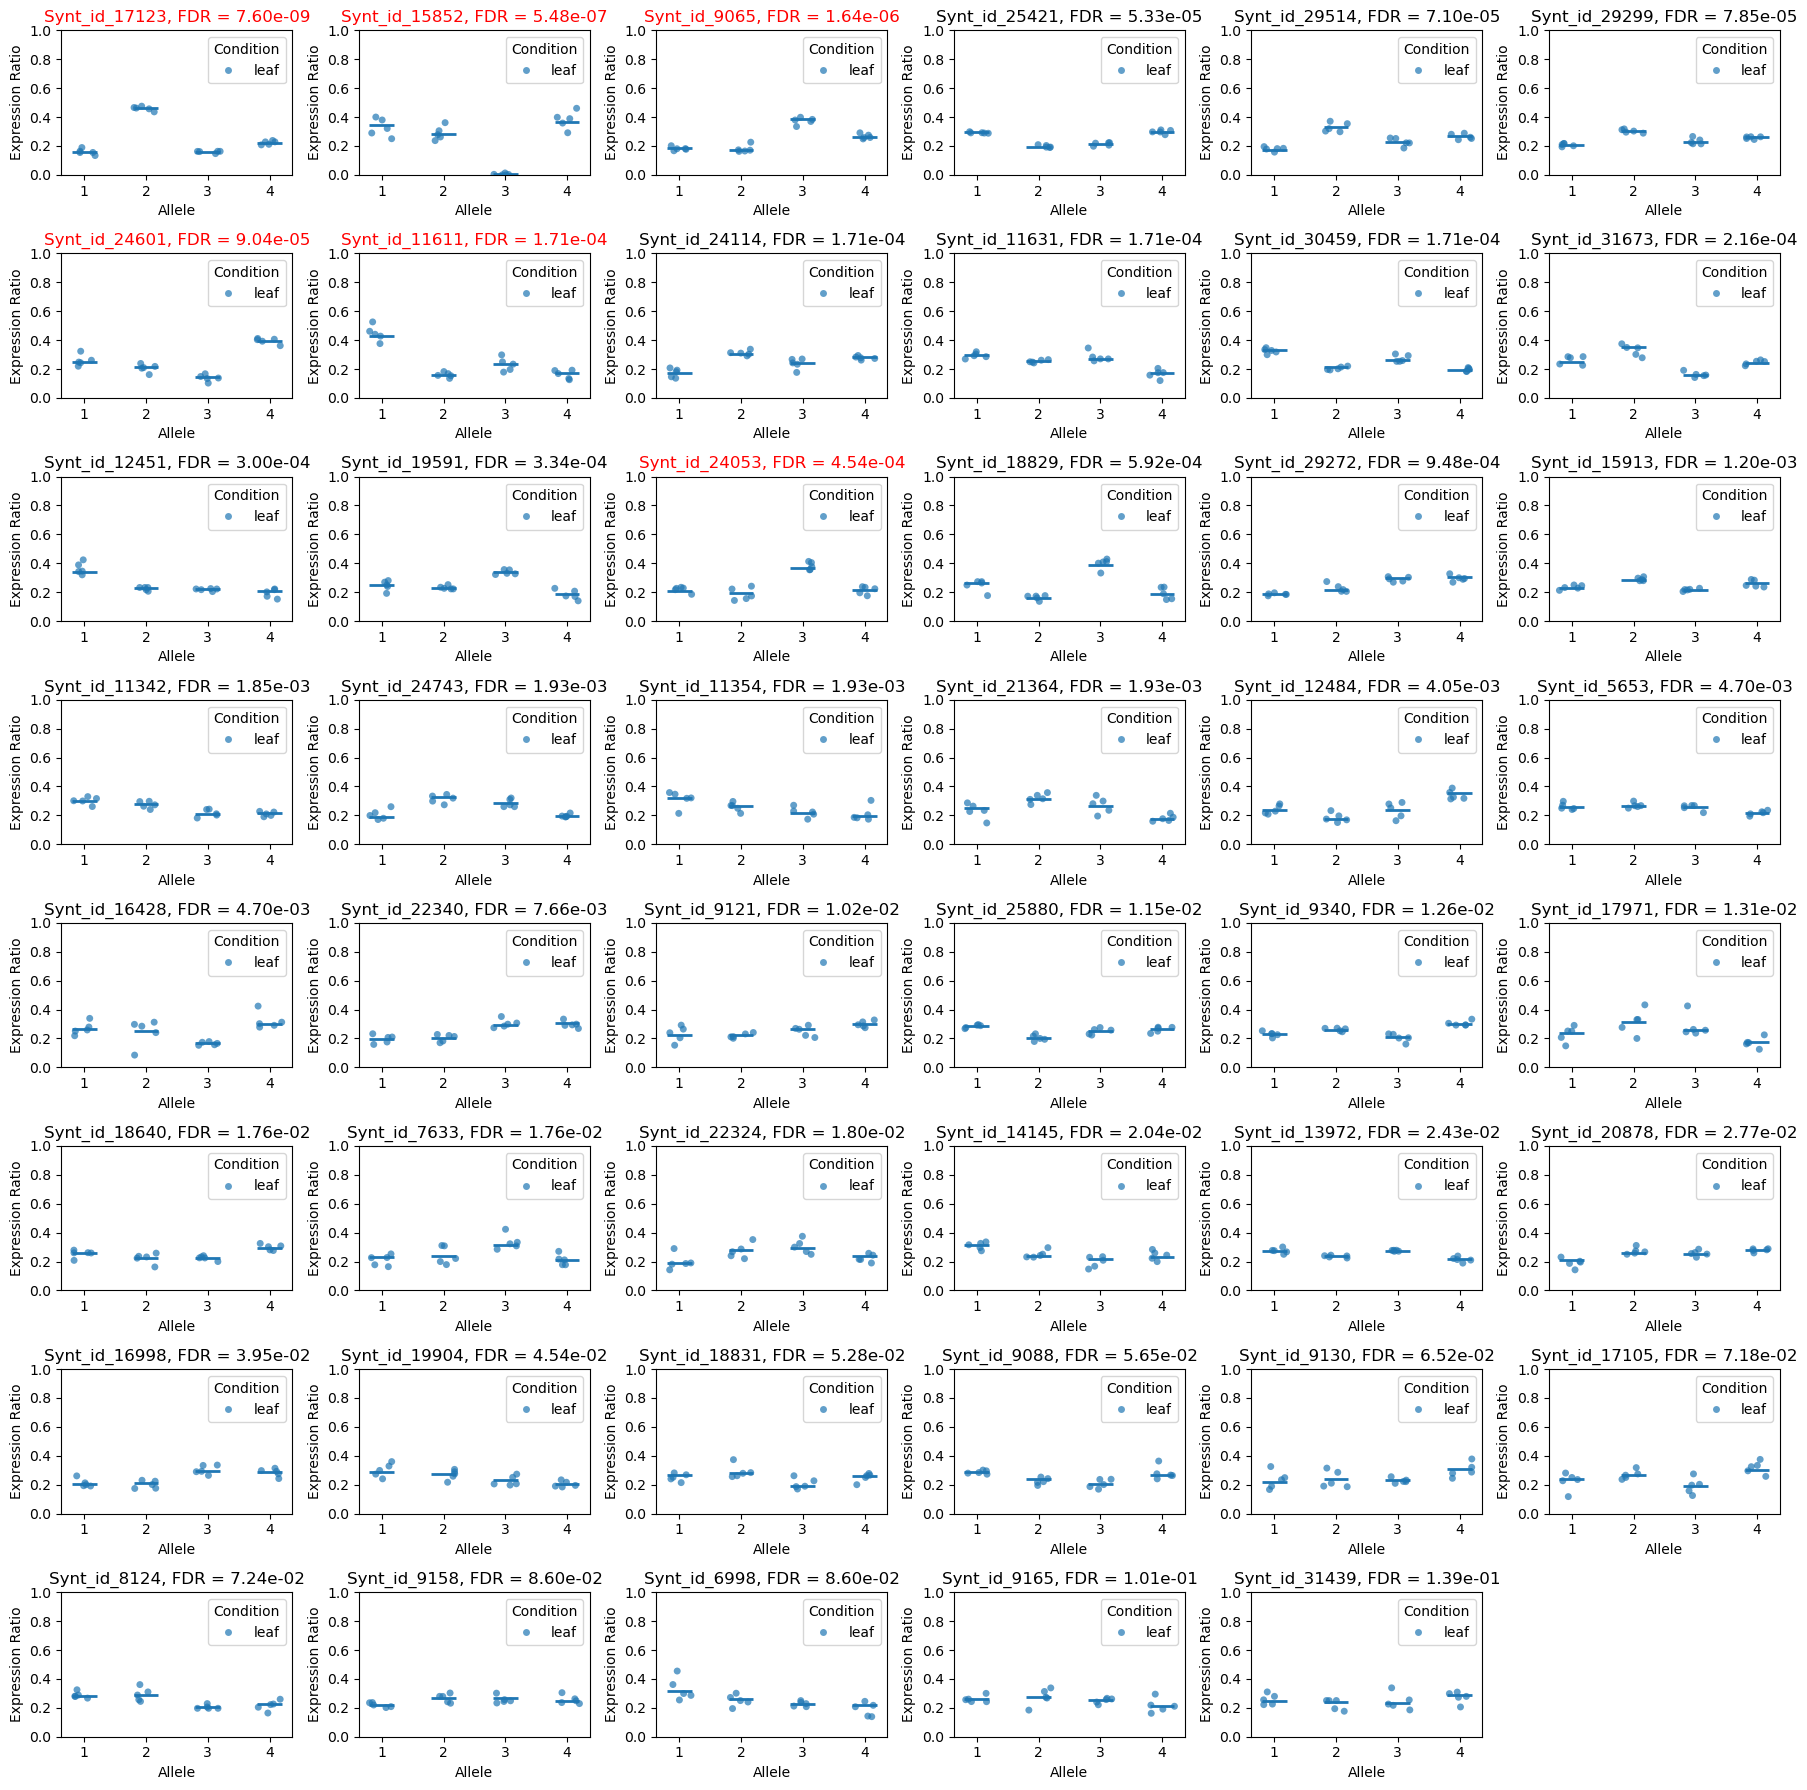

: 

In [ ]:
# look at all
my_n = 47
fig = plot_top_differential_syntelogs(results, figsize=(18, 3*6), n = my_n, difference_threshold=0.1, sort_by='FDR', sig_threshold=0.0005)

# 4) Testing for differential allele usage between tuber and leave

Now we can also test if between the two conditions (tuber and leaf) the allelic expression changes. E.g is there a dominant allele in tuber that is not expressed in leaf?

In [ ]:
# Filter to only include synteny category "1hap1_1hap2_1hap3_1hap4_s" 

mask = (allelic_data.var["CDS_haplotype_with_longest_annotation"] == "equal_lengths" ) & (allelic_data.var["multimapping_ratio"] < 0.25) & (allelic_data.var["synteny_category"] == "1hap1_1hap2_1hap3_1hap4_s")
allelic_data_length_filter = allelic_data[:,mask].copy()

: 

Why are we not filtering the allels with high multimapping ratios or unqual lengths?

Found 32 from 57 syntelogs with at least one significantly different allelic ratio (FDR < 0.05)


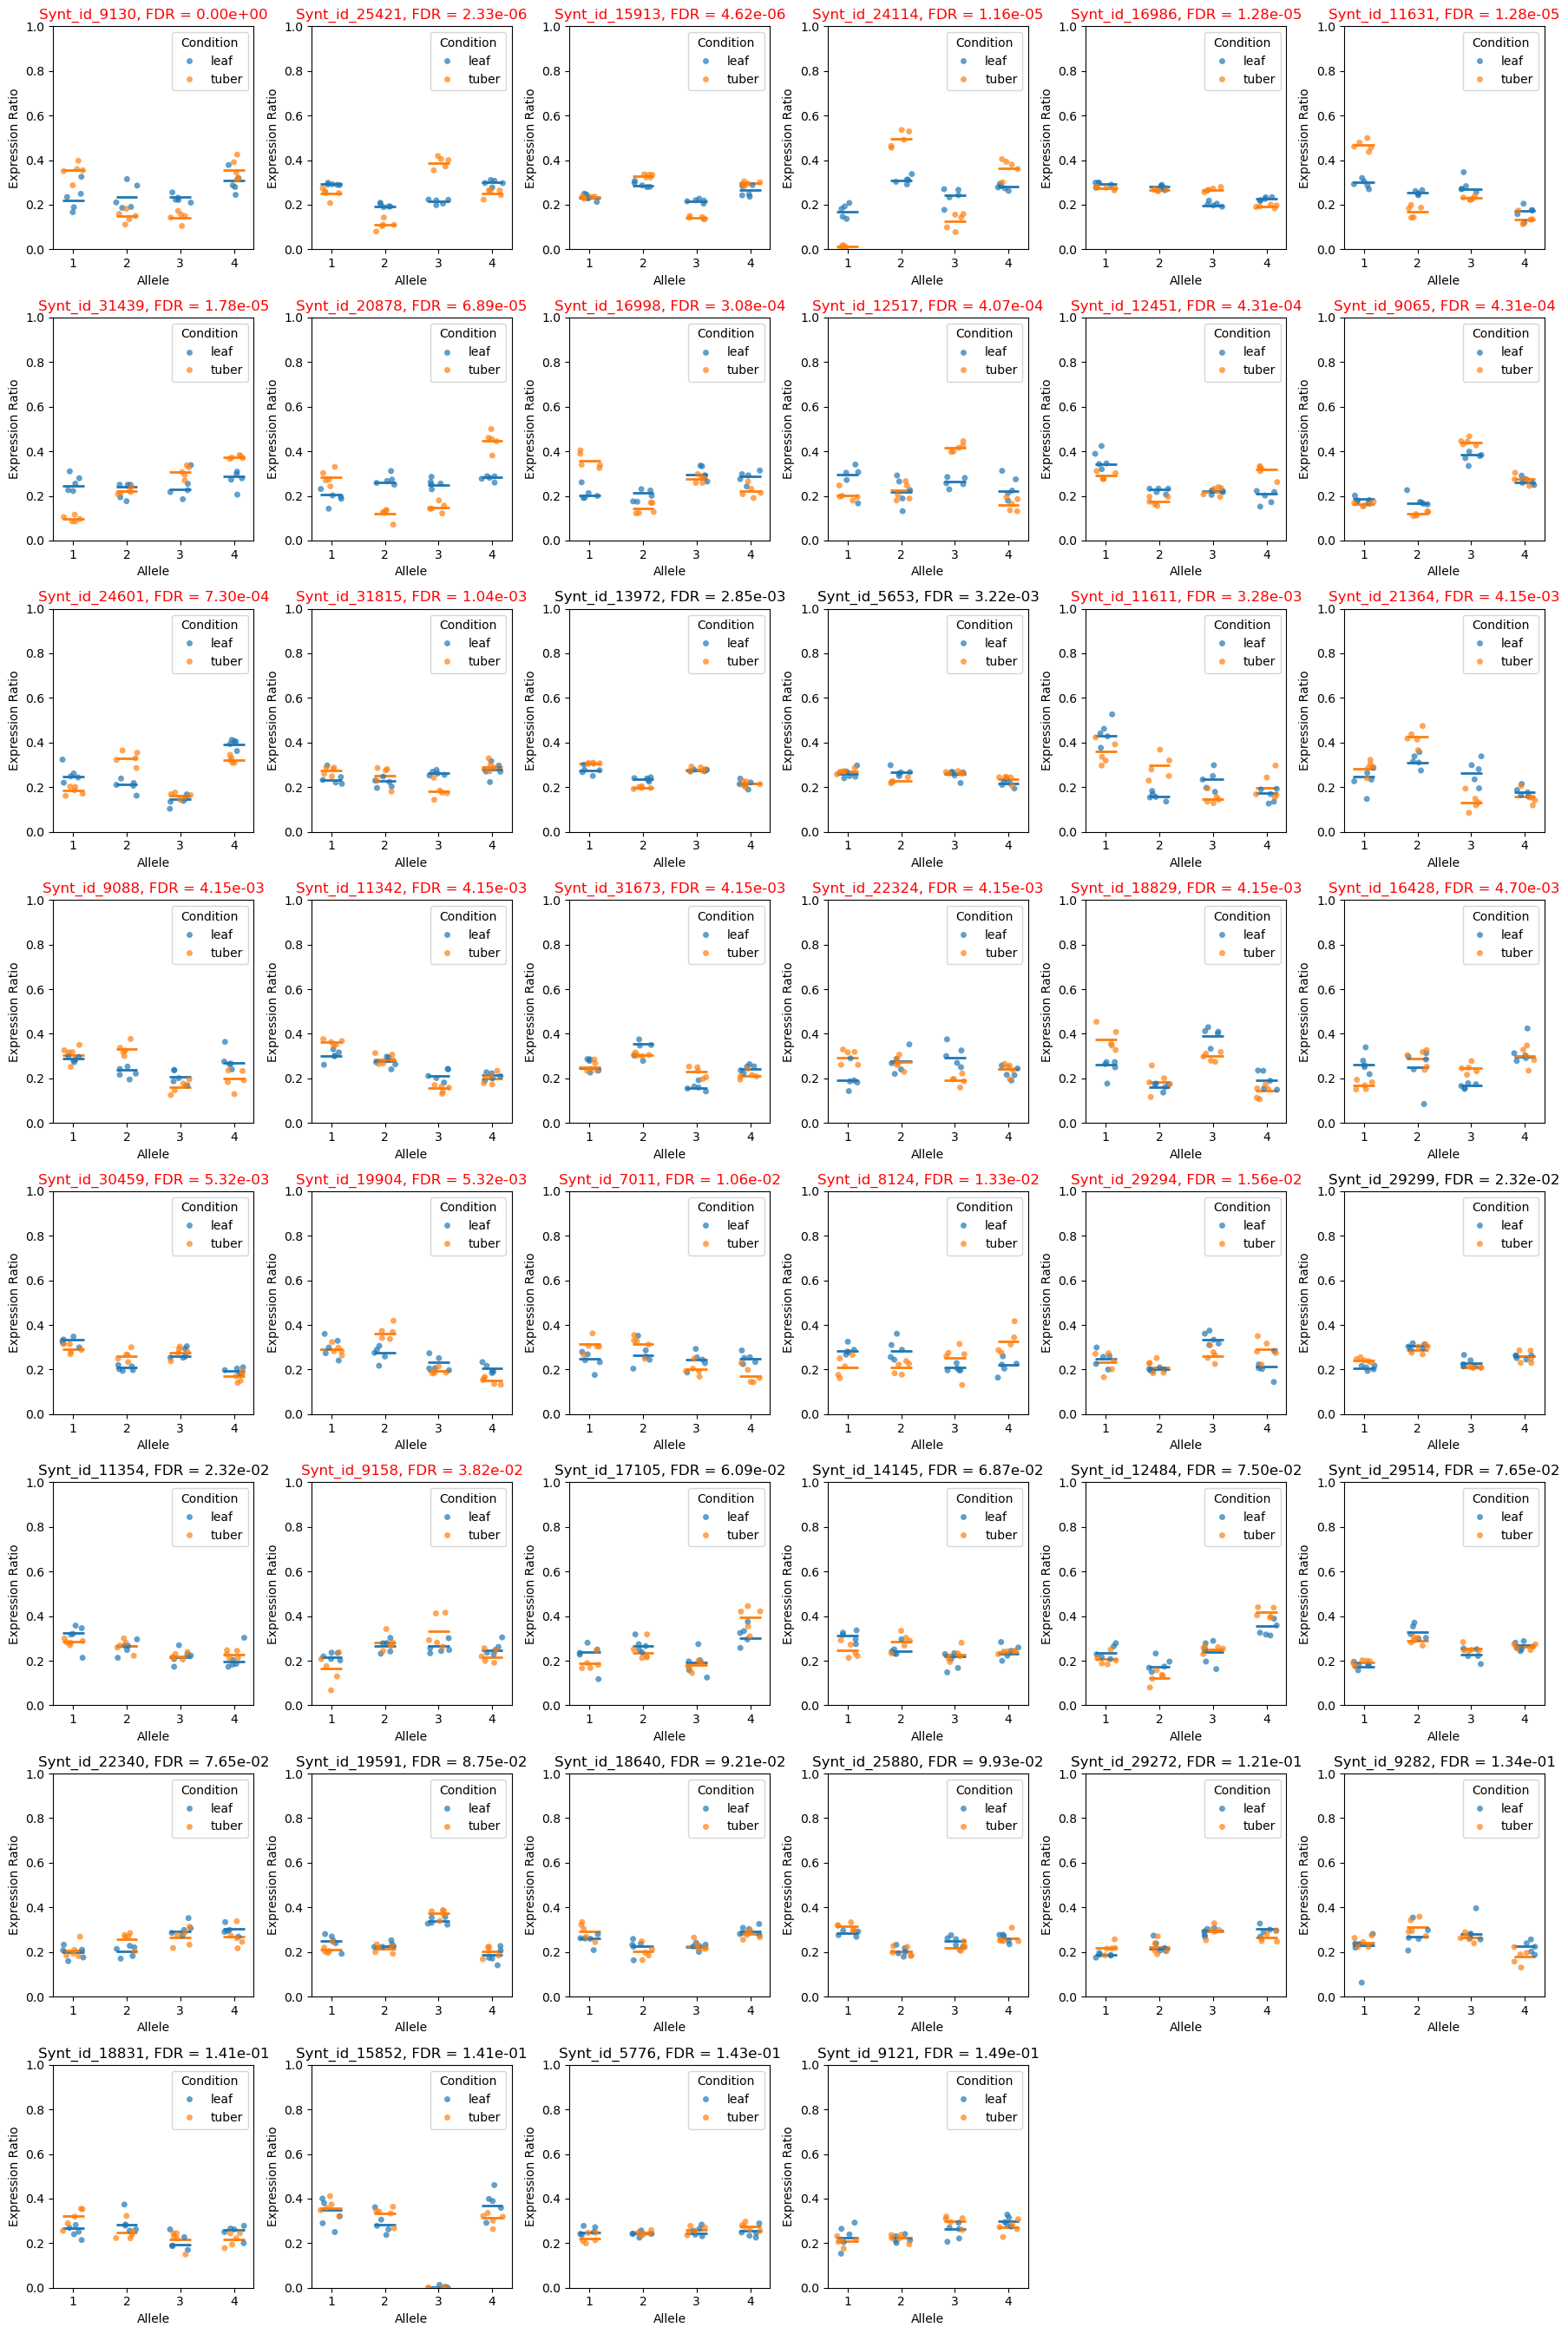

: 

In [ ]:
# 1. Run allelic ratio test
results_df_trans = test_allelic_ratios_between_conditions(allelic_data_length_filter, )

# 2. Get top differential syntelogs
top_results_trans = get_top_differential_syntelogs(results_df_trans, n=10, sort_by='FDR', fdr_threshold=0.05)

# 3. Plot the results
fig = plot_top_differential_syntelogs(results_df_trans,n = 46, figsize=(3*6, 3*9), sort_by='FDR')
plt.show()



https://spuddb.uga.edu/jb2/?session=share-3b8nGq87AT&password=R8aAc

In [ ]:
top_results_trans[top_results_trans["Synt_id"] == "Synt_id_31641"]

Empty DataFrame
Columns: [Synt_id, allele, transcript_id, p_value, ratio_difference, n_alleles, ratios_leaf_mean, ratios_rep_leaf, ratios_tuber_mean, ratios_rep_tuber, FDR]
Index: []

: 

![image.png](attachment:image.png)

#https://spuddb.uga.edu/jb2/?session=local-7vzorxQDd9kfw8i1oFRMz

In [ ]:
# test quartinary plot
#%pip install python-quaternary
%pip install ternary

Note: you may need to restart the kernel to use updated packages.


: 

In [ ]:
# remove fig 
fig.clf()

: 

In [ ]:
# group by Synt_id and make for each allele ratios_all mean column

results_melt = results.melt(id_vars=["Synt_id", "allele"], value_vars=["ratios_all_mean"]).sort_values(by=["Synt_id"])
# select the allele 1 
allele_1 = results_melt[results_melt["allele"] == "1"].copy()
allele_2 = results_melt[results_melt["allele"] == "2"].copy()
allele_3 = results_melt[results_melt["allele"] == "3"].copy()
allele_4 = results_melt[results_melt["allele"] == "4"].copy()


KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['ratios_all_mean']"

: 

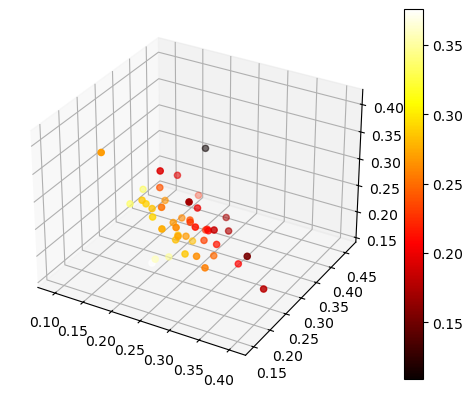

: 

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = allele_1["value"]
y = allele_2["value"]
z = allele_3["value"]
c = allele_4["value"]


img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_ternary()
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

: 

In [ ]:
quat.plot(1, 2,3 )

: 